1. Mounting Google Drive

In [1]:
from google.colab import drive

# Mounting the drive (if already mounted, it will remount)
drive.mount('/content/drive', force_remount=True)


Mounted at /content/drive


2. Accessing and Loading CSV Files

In [2]:
import os
import pandas as pd

# Paths to the CSV files in Google Drive
reviews_path = '/content/drive/MyDrive/Movie_Recommendation_System/rotten_tomatoes_movie_reviews.csv'
movies_path = '/content/drive/MyDrive/Movie_Recommendation_System/rotten_tomatoes_movies.csv'

# Function to load datasets
def load_data(reviews_path, movies_path):
    """
    Load and inspect the datasets.

    Args:
        reviews_path (str): Path to the reviews dataset.
        movies_path (str): Path to the movies dataset.

    Returns:
        pd.DataFrame: DataFrames of reviews and movies.
    """
    try:
        if os.path.exists(reviews_path) and os.path.exists(movies_path):
            # Load CSV files into DataFrames
            reviews_df = pd.read_csv(reviews_path)
            movies_df = pd.read_csv(movies_path)

            # Display dataset information
            print("=== Reviews DataFrame Info ===")
            reviews_df.info()

            print("\n=== Movies DataFrame Info ===")
            movies_df.info()

            # Display a few rows of each dataset
            print("\n=== First few rows of Reviews DataFrame ===")
            print(reviews_df.head())

            print("\n=== First few rows of Movies DataFrame ===")
            print(movies_df.head())

            # Display summary statistics
            print("\n=== Summary Statistics for Movies Dataset ===")
            print(movies_df.describe())

            print("\n=== Summary Statistics for Reviews Dataset ===")
            print(reviews_df.describe())

            return reviews_df, movies_df
        else:
            raise FileNotFoundError("One or both CSV files not found. Please check the paths.")
    except FileNotFoundError as e:
        print(f"Error: {str(e)}")
    except pd.errors.EmptyDataError:
        print("Error: CSV file is empty.")
    except pd.errors.ParserError:
        print("Error: CSV file is badly formatted.")
    except Exception as e:
        print(f"Unexpected error: {str(e)}")
    return None, None

# Load the datasets
reviews_df, movies_df = load_data(reviews_path, movies_path)


=== Reviews DataFrame Info ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1444963 entries, 0 to 1444962
Data columns (total 11 columns):
 #   Column          Non-Null Count    Dtype 
---  ------          --------------    ----- 
 0   id              1444963 non-null  object
 1   reviewId        1444963 non-null  int64 
 2   creationDate    1444963 non-null  object
 3   criticName      1444963 non-null  object
 4   isTopCritic     1444963 non-null  bool  
 5   originalScore   1009745 non-null  object
 6   reviewState     1444963 non-null  object
 7   publicatioName  1444963 non-null  object
 8   reviewText      1375738 non-null  object
 9   scoreSentiment  1444963 non-null  object
 10  reviewUrl       1234038 non-null  object
dtypes: bool(1), int64(1), object(9)
memory usage: 111.6+ MB

=== Movies DataFrame Info ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 143258 entries, 0 to 143257
Data columns (total 16 columns):
 #   Column                Non-Null Count   Dtype  
---

3. Syncing with GitHub

In [3]:
# Install dotenv to handle environment variables
!pip install python-dotenv

import os
from dotenv import load_dotenv

# Step 1: Define paths and sensitive information
env_file_path = '/content/drive/MyDrive/.env'
github_pat = 'YOUR_GITHUB_PAT'  # Replace with your actual PAT

# Step 2: Write the GitHub PAT to the .env file if it doesn't exist
def write_to_env(file_path, pat):
    try:
        if not os.path.exists(file_path):
            with open(file_path, 'w') as f:
                f.write(f"GITHUB_PAT={pat}\n")
            print(".env file created and PAT written.")
        else:
            print(".env file already exists.")
    except Exception as e:
        print(f"Error writing to .env file: {str(e)}")

# Write the PAT to .env
write_to_env(env_file_path, github_pat)

# Step 3: Load the .env file
load_dotenv(env_file_path)

# Step 4: Clone the GitHub repository if not already cloned
repo_dir = '/content/Movie-Recommendation-System'
repo_url = 'https://github.com/TejaswiniVasu/Movie-Recommendation-System.git'

if not os.path.exists(repo_dir):
    try:
        print("Repository directory not found. Cloning repository...")
        os.system(f"git clone {repo_url} {repo_dir}")
        print("Repository cloned successfully.")
    except Exception as e:
        print(f"Error cloning the repository: {str(e)}")
else:
    print("Repository already exists.")


.env file already exists.
Repository directory not found. Cloning repository...
Repository cloned successfully.


4. Copying CSV Files to Colab Working Directory

In [4]:
import os

# Define the source and destination paths for the CSV files
reviews_source = '/content/drive/MyDrive/Movie_Recommendation_System/rotten_tomatoes_movie_reviews.csv'
movies_source = '/content/drive/MyDrive/Movie_Recommendation_System/rotten_tomatoes_movies.csv'
reviews_dest = '/content/rotten_tomatoes_movie_reviews.csv'
movies_dest = '/content/rotten_tomatoes_movies.csv'

# Function to copy files and check if successful
def copy_file(src, dest):
    try:
        if os.path.exists(src):
            os.system(f"cp {src} {dest}")
            print(f"File copied successfully: {os.path.basename(src)}")
        else:
            print(f"Source file not found: {src}")
    except Exception as e:
        print(f"Error copying file: {str(e)}")

# Copy the files from Google Drive to the Colab working directory
copy_file(reviews_source, reviews_dest)
copy_file(movies_source, movies_dest)

# List files in the Colab working directory to verify the copy was successful
os.system("ls /content/")


File copied successfully: rotten_tomatoes_movie_reviews.csv
File copied successfully: rotten_tomatoes_movies.csv


0

In [5]:
# Install surprise library (for SVD)
!pip install scikit-surprise

# Install sklearn for NMF and other utilities
!pip install scikit-learn

# Install pandas for data manipulation
!pip install pandas

# Install matplotlib and seaborn for visualizations
!pip install matplotlib seaborn

# Install numpy for numerical computations
!pip install numpy


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.4/154.4 kB 4.6 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.4-cp310-cp310-linux_x86_64.whl size=2357274 sha256=7bbda030a5c6c9f4edf1e60d9f59dd04ba77b36fd90a2d7abd83b05f85ef461d
  Stored in directory: /root/.cache/pip/wheels/4b/3f/df/6acbf0a40397d9bf3ff97f582cc22fb9ce66adde75bc71fd54
Successfully built scikit-surprise


1. Data Collection & Preparation
1.1 Load Datasets:
Load both rotten_tomatoes_movies.csv and rotten_tomatoes_movie_reviews.csv.
Inspect the data structure, number of rows, columns, and data types.
1.2 Merge Datasets:
Use the id column to merge both datasets, ensuring proper alignment for analysis.
Keep only necessary columns for model building, such as movie features (audienceScore, genre, director) and review features (scoreSentiment, criticName).

In [6]:
# Title: Data Collection & Preparation

# Importing required libraries
import os
import pandas as pd

# Subtitle: Step 1 - Load Datasets
# Define file paths dynamically
reviews_path = '/content/drive/MyDrive/Movie_Recommendation_System/rotten_tomatoes_movie_reviews.csv'
movies_path = '/content/drive/MyDrive/Movie_Recommendation_System/rotten_tomatoes_movies.csv'

# Function to load and inspect the datasets
def load_and_inspect_data(reviews_path, movies_path):
    """
    Load and inspect the datasets. This step involves loading CSV files and performing initial data exploration.

    Args:
        reviews_path (str): Path to the reviews dataset.
        movies_path (str): Path to the movies dataset.

    Returns:
        pd.DataFrame: DataFrames of reviews and movies.
    """
    try:
        if os.path.exists(reviews_path) and os.path.exists(movies_path):
            # Load CSV files into DataFrames
            reviews_df = pd.read_csv(reviews_path, dtype={'reviewId': 'int64', 'isTopCritic': 'bool'})
            movies_df = pd.read_csv(movies_path, dtype={'audienceScore': 'float64', 'tomatoMeter': 'float64'})

            # Display dataset info
            print("=== Movies Dataset Info ===")
            movies_df.info()

            print("\n=== Reviews Dataset Info ===")
            reviews_df.info()

            # Check for missing values
            print("\n=== Missing Values in Movies Dataset ===")
            print(movies_df.isnull().sum())

            print("\n=== Missing Values in Reviews Dataset ===")
            print(reviews_df.isnull().sum())

            return reviews_df, movies_df
        else:
            raise FileNotFoundError("One or both CSV files not found. Please check the paths.")
    except Exception as e:
        print(f"Error: {str(e)}")
        return None, None

# Load the datasets
reviews_df, movies_df = load_and_inspect_data(reviews_path, movies_path)

# Subtitle: Step 2 - Merging Datasets
def merge_datasets(reviews_df, movies_df):
    """
    Merge the movie and review datasets on the 'id' column.

    Args:
        reviews_df (pd.DataFrame): The reviews dataset.
        movies_df (pd.DataFrame): The movies dataset.

    Returns:
        pd.DataFrame: Merged dataset.
    """
    try:
        # Merge on 'id' column (movie ID)
        merged_df = pd.merge(movies_df, reviews_df, on='id', how='inner')

        # Keep only necessary columns for model building
        columns_to_keep = ['id', 'title', 'audienceScore', 'genre', 'director', 'criticName', 'scoreSentiment']
        merged_df = merged_df[columns_to_keep]

        # Display merged dataset info
        print("\n=== Merged Dataset Info ===")
        merged_df.info()

        # Check the first few rows of the merged dataset
        print("\n=== First few rows of Merged Dataset ===")
        print(merged_df.head())

        return merged_df
    except Exception as e:
        print(f"Error during merging: {str(e)}")
        return None

# Merge the datasets
merged_df = merge_datasets(reviews_df, movies_df)

# Display merged dataset information
if merged_df is not None:
    print("\nMerged dataset successfully created!")
else:
    print("\nFailed to merge datasets.")


=== Movies Dataset Info ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 143258 entries, 0 to 143257
Data columns (total 16 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    143258 non-null  object 
 1   title                 142891 non-null  object 
 2   audienceScore         73248 non-null   float64
 3   tomatoMeter           33877 non-null   float64
 4   rating                13991 non-null   object 
 5   ratingContents        13991 non-null   object 
 6   releaseDateTheaters   30773 non-null   object 
 7   releaseDateStreaming  79420 non-null   object 
 8   runtimeMinutes        129431 non-null  float64
 9   genre                 132175 non-null  object 
 10  originalLanguage      129400 non-null  object 
 11  director              139041 non-null  object 
 12  writer                90116 non-null   object 
 13  boxOffice             14743 non-null   object 
 14  distributor           23

2. Data Cleaning
2.1 Remove Unnecessary Columns:
Delete irrelevant columns (e.g., reviewText, reviewUrl) unless needed for specific analysis.
2.2 Handle Missing Values:
If a column has 70%-75% missing data, delete it.
For less than 50% missing data, apply mean/median imputation for numerical columns and mode imputation for categorical columns.
Use forward/backward fill where applicable.
Validate: Ensure the distribution remains consistent before and after imputation.
3. Outlier Detection
Use Z-score or IQR methods to detect outliers in numerical data like audienceScore and boxOffice.
Visualize outliers using box plots and remove or cap extreme values to avoid skewing the model.
4. Duplicate Removal
Check and remove duplicate entries, especially for movies and reviews.

Columns dropped (>75.0% missing): ['tomatoMeter', 'rating', 'ratingContents', 'releaseDateTheaters', 'boxOffice', 'distributor', 'soundMix']
Imputed audienceScore with mean (normal distribution).
Imputed runtimeMinutes with median (high skewness).
Imputed title with mode (most frequent value).
Imputed releaseDateStreaming with mode (most frequent value).
Imputed genre with mode (most frequent value).
Imputed originalLanguage with mode (most frequent value).
Imputed director with mode (most frequent value).
Imputed writer with mode (most frequent value).


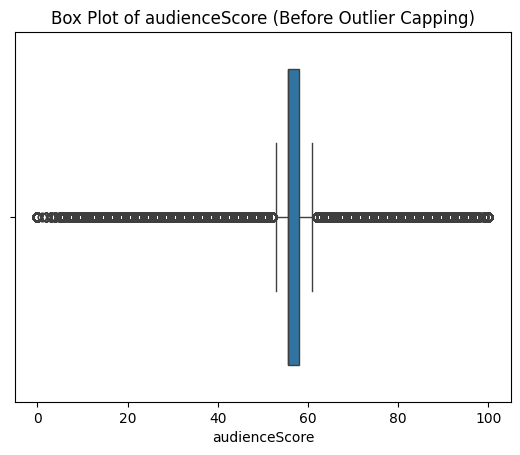

Outliers capped for audienceScore.


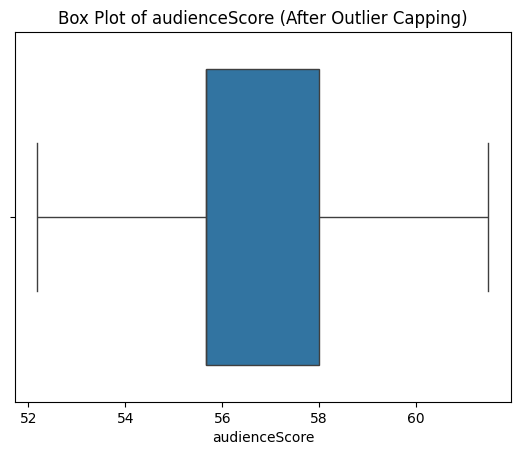

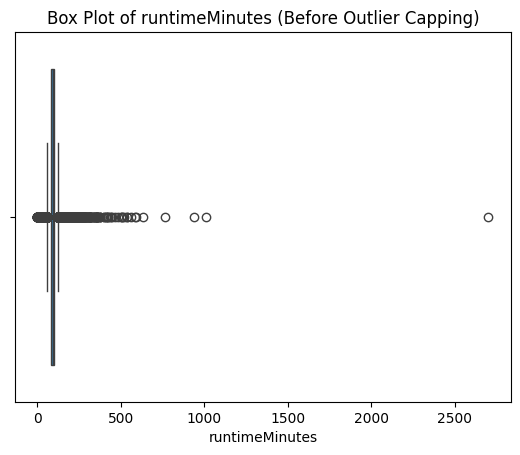

Outliers capped for runtimeMinutes.


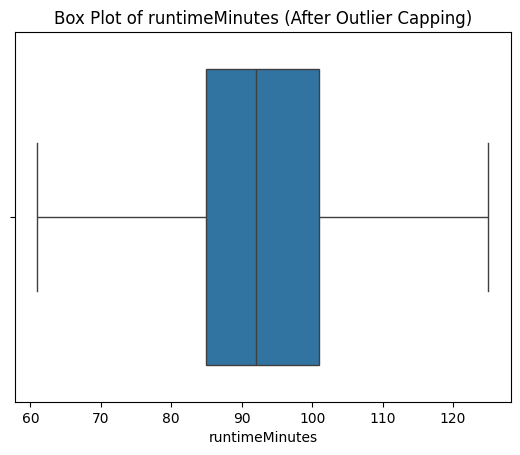

Number of duplicate rows in Movies Dataset before removal: 1204
Movies Dataset shape after removing duplicates: (142054, 9)
Number of duplicate rows in Reviews Dataset before removal: 12394
Reviews Dataset shape after removing duplicates: (1432569, 11)
Cleaned Movies dataset saved to /content/drive/MyDrive/Movie_Recommendation_System/cleaned_rotten_tomatoes_movies.csv
Cleaned Reviews dataset saved to /content/drive/MyDrive/Movie_Recommendation_System/cleaned_rotten_tomatoes_reviews.csv


In [7]:
# Title: Data Cleaning - Handling Missing Values, Removing Duplicates, and Outlier Treatment
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import os

# Load the datasets from Google Drive
movies_path = '/content/drive/MyDrive/Movie_Recommendation_System/rotten_tomatoes_movies.csv'
reviews_path = '/content/drive/MyDrive/Movie_Recommendation_System/rotten_tomatoes_movie_reviews.csv'

movies_df = pd.read_csv(movies_path)
reviews_df = pd.read_csv(reviews_path)

# Step 1: Remove columns with more than 75% missing data in the Movies dataset
missing_threshold = 0.75
movies_missing_percent = movies_df.isnull().mean()
columns_to_drop = movies_missing_percent[movies_missing_percent > missing_threshold].index
movies_df_cleaned = movies_df.drop(columns=columns_to_drop)
print(f"Columns dropped (>{missing_threshold*100}% missing): {list(columns_to_drop)}")

# Step 2: Impute missing values
# - For numeric columns: Use median if the distribution is skewed, otherwise use mean
# - For categorical columns: Use mode (most frequent value)

numeric_columns = movies_df_cleaned.select_dtypes(include=['float64', 'int64']).columns
categorical_columns = movies_df_cleaned.select_dtypes(include=['object']).columns

# Numeric column imputation
for column in numeric_columns:
    if movies_df_cleaned[column].isnull().sum() > 0:
        skewness = movies_df_cleaned[column].skew()
        if skewness > 1:  # High skewness: Use median
            movies_df_cleaned[column].fillna(movies_df_cleaned[column].median(), inplace=True)
            print(f"Imputed {column} with median (high skewness).")
        else:  # Normal distribution: Use mean
            movies_df_cleaned[column].fillna(movies_df_cleaned[column].mean(), inplace=True)
            print(f"Imputed {column} with mean (normal distribution).")

# Categorical column imputation
for column in categorical_columns:
    if movies_df_cleaned[column].isnull().sum() > 0:
        movies_df_cleaned[column].fillna(movies_df_cleaned[column].mode()[0], inplace=True)
        print(f"Imputed {column} with mode (most frequent value).")

# Step 3: Outlier Detection and Treatment using IQR
def cap_outliers(df, column_name):
    Q1 = df[column_name].quantile(0.25)
    Q3 = df[column_name].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df[column_name] = df[column_name].clip(lower_bound, upper_bound)
    print(f"Outliers capped for {column_name}.")
    return df

# Apply outlier treatment only to key numeric columns
outlier_columns = ['audienceScore', 'runtimeMinutes']
for column in outlier_columns:
    sns.boxplot(data=movies_df_cleaned, x=column)
    plt.title(f'Box Plot of {column} (Before Outlier Capping)')
    plt.show()

    movies_df_cleaned = cap_outliers(movies_df_cleaned, column)

    sns.boxplot(data=movies_df_cleaned, x=column)
    plt.title(f'Box Plot of {column} (After Outlier Capping)')
    plt.show()

# Step 4: Remove duplicates
duplicates_movies = movies_df_cleaned.duplicated().sum()
print(f"Number of duplicate rows in Movies Dataset before removal: {duplicates_movies}")
movies_df_cleaned = movies_df_cleaned.drop_duplicates()
print(f"Movies Dataset shape after removing duplicates: {movies_df_cleaned.shape}")

duplicates_reviews = reviews_df.duplicated().sum()
print(f"Number of duplicate rows in Reviews Dataset before removal: {duplicates_reviews}")
reviews_df_cleaned = reviews_df.drop_duplicates()
print(f"Reviews Dataset shape after removing duplicates: {reviews_df_cleaned.shape}")

# Step 5: Save the cleaned datasets
movies_cleaned_path = '/content/drive/MyDrive/Movie_Recommendation_System/cleaned_rotten_tomatoes_movies.csv'
reviews_cleaned_path = '/content/drive/MyDrive/Movie_Recommendation_System/cleaned_rotten_tomatoes_reviews.csv'

movies_df_cleaned.to_csv(movies_cleaned_path, index=False)
reviews_df_cleaned.to_csv(reviews_cleaned_path, index=False)

print(f"Cleaned Movies dataset saved to {movies_cleaned_path}")
print(f"Cleaned Reviews dataset saved to {reviews_cleaned_path}")


6. Exploratory Data Analysis (EDA)
6.1 Univariate Analysis:
Plot distributions for each feature (e.g., histograms for audienceScore, bar plots for genre).
6.2 Bivariate Analysis:
Investigate correlations between features (e.g., tomatoMeter vs. boxOffice using scatter plots).
Visualize correlations using heatmaps.
6.3 Insights:
Derive business insights (e.g., genres with the highest ratings, most frequent directors).
Investigate if the dataset is imbalanced (e.g., more popular genres, skewed audience ratings).

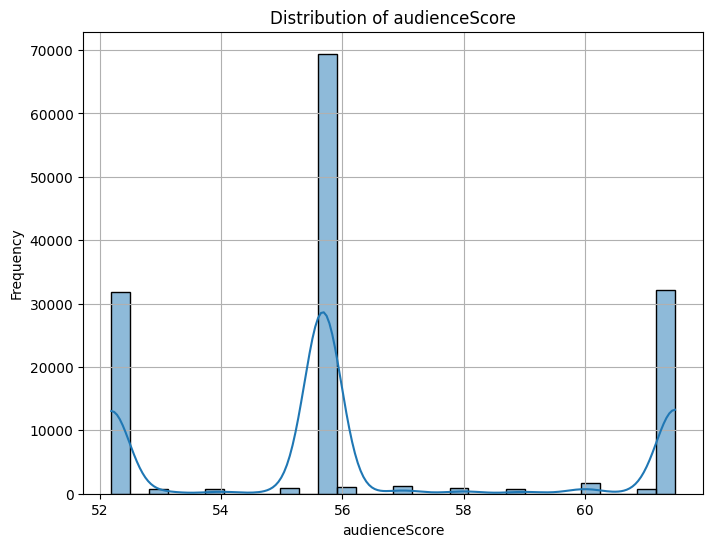

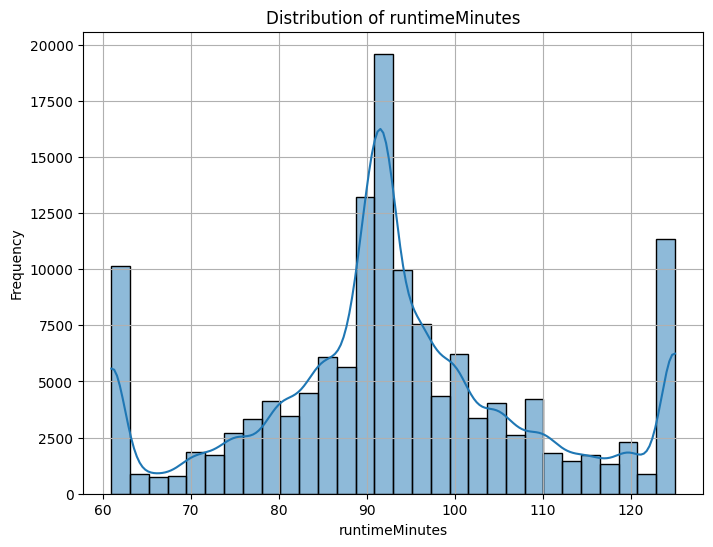

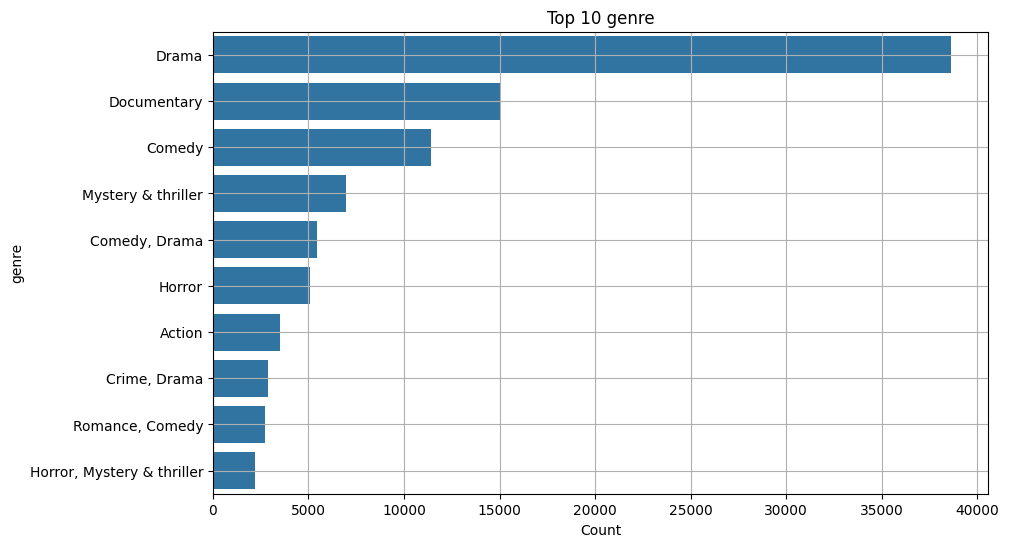

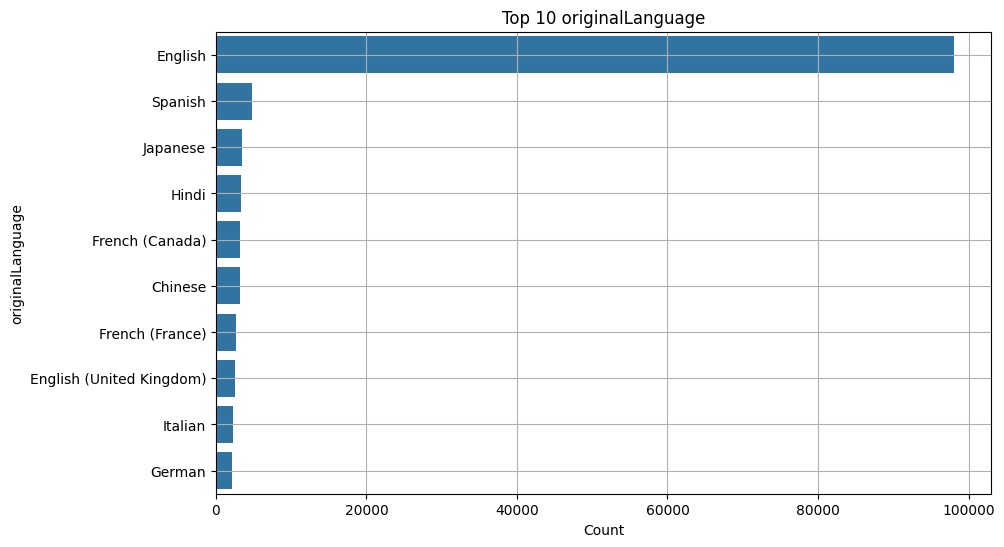

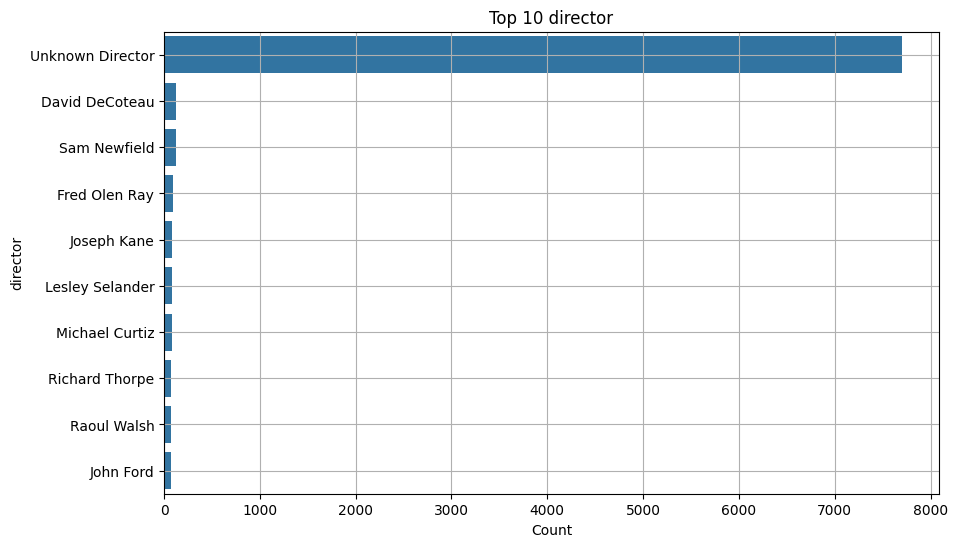

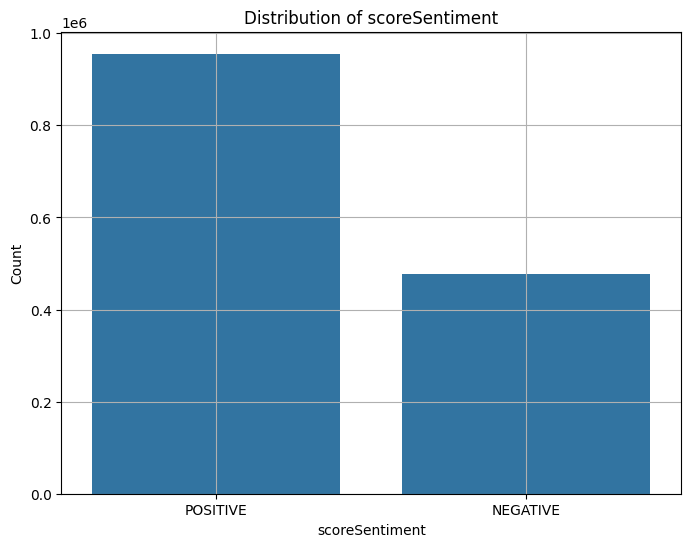

In [8]:
# Title: Exploratory Data Analysis (EDA) - Univariate Analysis

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the cleaned datasets
movies_path = '/content/drive/MyDrive/Movie_Recommendation_System/cleaned_rotten_tomatoes_movies.csv'
reviews_path = '/content/drive/MyDrive/Movie_Recommendation_System/cleaned_rotten_tomatoes_reviews.csv'

movies_df = pd.read_csv(movies_path)
reviews_df = pd.read_csv(reviews_path)

# Subtitle: Step 1 - Univariate Analysis for Numerical Features

def plot_histograms(df, numerical_columns):
    """
    Plot histograms for numerical columns to show the distribution.

    Args:
        df (pd.DataFrame): DataFrame containing the data.
        numerical_columns (list): List of numerical columns to plot.
    """
    for col in numerical_columns:
        plt.figure(figsize=(8, 6))
        sns.histplot(df[col].dropna(), kde=True, bins=30)
        plt.title(f'Distribution of {col}')
        plt.xlabel(col)
        plt.ylabel('Frequency')
        plt.grid(True)
        plt.show()

# Example numerical columns for analysis
numerical_columns = ['audienceScore', 'runtimeMinutes']

# Plot histograms for numerical columns
plot_histograms(movies_df, numerical_columns)

# Subtitle: Step 2 - Univariate Analysis for Categorical Features

def plot_bar_charts(df, categorical_columns, top_n=10):
    """
    Plot bar charts for categorical columns to show the frequency distribution.

    Args:
        df (pd.DataFrame): DataFrame containing the data.
        categorical_columns (list): List of categorical columns to plot.
        top_n (int): Number of top categories to display (default: 10).
    """
    for col in categorical_columns:
        plt.figure(figsize=(10, 6))
        top_categories = df[col].value_counts().nlargest(top_n)
        sns.barplot(x=top_categories.values, y=top_categories.index)
        plt.title(f'Top {top_n} {col}')
        plt.xlabel('Count')
        plt.ylabel(col)
        plt.grid(True)
        plt.show()

# Example categorical columns for analysis
categorical_columns = ['genre', 'originalLanguage', 'director']

# Plot bar charts for categorical columns
plot_bar_charts(movies_df, categorical_columns)

# Subtitle: Step 3 - Univariate Analysis for Sentiments in Reviews

def plot_sentiment_distribution(df, sentiment_column='scoreSentiment'):
    """
    Plot the distribution of sentiments (positive, negative) in the reviews dataset.

    Args:
        df (pd.DataFrame): DataFrame containing the reviews data.
        sentiment_column (str): The sentiment column to analyze (default: 'scoreSentiment').
    """
    plt.figure(figsize=(8, 6))
    sentiment_counts = df[sentiment_column].value_counts()
    sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values)
    plt.title(f'Distribution of {sentiment_column}')
    plt.xlabel(sentiment_column)
    plt.ylabel('Count')
    plt.grid(True)
    plt.show()

# Plot sentiment distribution in the reviews dataset
plot_sentiment_distribution(reviews_df)


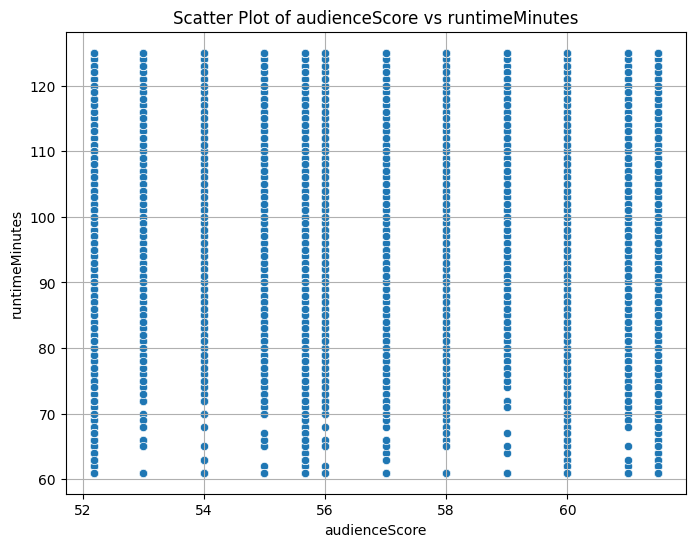

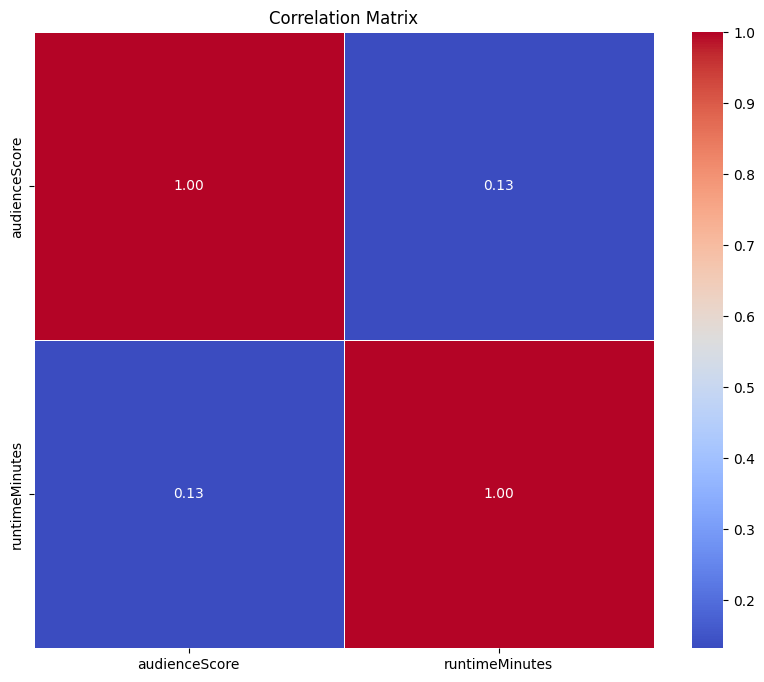

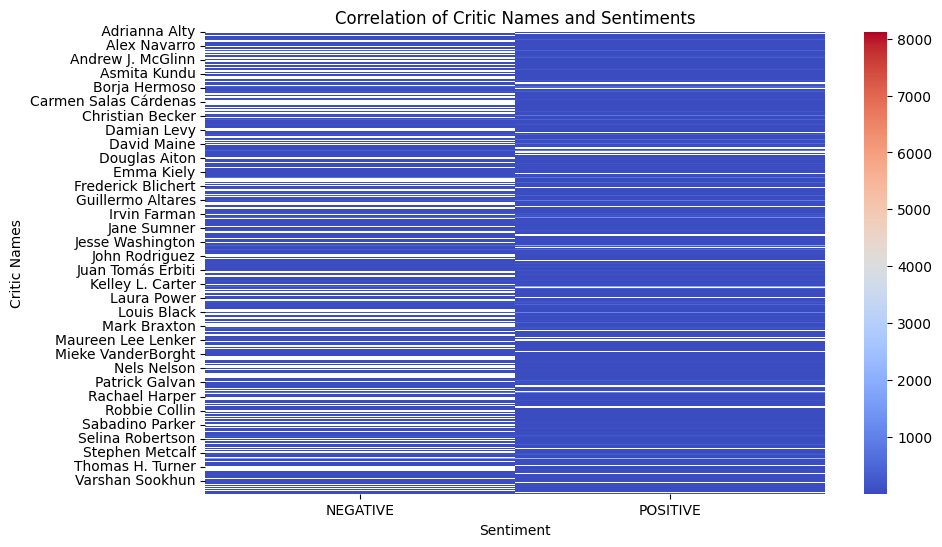

In [9]:
# Title: Exploratory Data Analysis (EDA) - Bivariate Analysis

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the cleaned datasets
movies_path = '/content/drive/MyDrive/Movie_Recommendation_System/cleaned_rotten_tomatoes_movies.csv'
reviews_path = '/content/drive/MyDrive/Movie_Recommendation_System/cleaned_rotten_tomatoes_reviews.csv'

movies_df = pd.read_csv(movies_path)
reviews_df = pd.read_csv(reviews_path)

# Subtitle: Step 1 - Scatter Plot for Numerical Variables

def scatter_plot(df, x_col, y_col):
    """
    Create scatter plots to show the relationship between two numerical variables.

    Args:
        df (pd.DataFrame): DataFrame containing the data.
        x_col (str): Column for the x-axis.
        y_col (str): Column for the y-axis.
    """
    plt.figure(figsize=(8, 6))
    sns.scatterplot(data=df, x=x_col, y=y_col)
    plt.title(f'Scatter Plot of {x_col} vs {y_col}')
    plt.xlabel(x_col)
    plt.ylabel(y_col)
    plt.grid(True)
    plt.show()

# Example scatter plots between audienceScore and runtimeMinutes
scatter_plot(movies_df, 'audienceScore', 'runtimeMinutes')

# Subtitle: Step 2 - Correlation Matrix for Numerical Features

def correlation_matrix(df, numerical_columns):
    """
    Generate and plot the correlation matrix for numerical columns.

    Args:
        df (pd.DataFrame): DataFrame containing the data.
        numerical_columns (list): List of numerical columns to include in the correlation matrix.
    """
    corr_matrix = df[numerical_columns].corr()

    plt.figure(figsize=(10, 8))
    sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
    plt.title('Correlation Matrix')
    plt.show()

# Select numerical columns for correlation matrix
numerical_columns = ['audienceScore', 'runtimeMinutes']  # Add more columns as necessary

# Plot correlation matrix heatmap
correlation_matrix(movies_df, numerical_columns)

# Subtitle: Step 3 - Correlation of Sentiments in Reviews

def sentiment_correlation(df):
    """
    Analyze how critic names and sentiments correlate (using basic frequency analysis).

    Args:
        df (pd.DataFrame): DataFrame containing the reviews data.
    """
    plt.figure(figsize=(10, 6))
    sentiment_counts = df.groupby('criticName')['scoreSentiment'].value_counts().unstack()
    sns.heatmap(sentiment_counts, cmap="coolwarm", annot=False)
    plt.title('Correlation of Critic Names and Sentiments')
    plt.xlabel('Sentiment')
    plt.ylabel('Critic Names')
    plt.show()

# Run the sentiment correlation analysis in the reviews dataset
sentiment_correlation(reviews_df)


Further Bivariate Analysis:

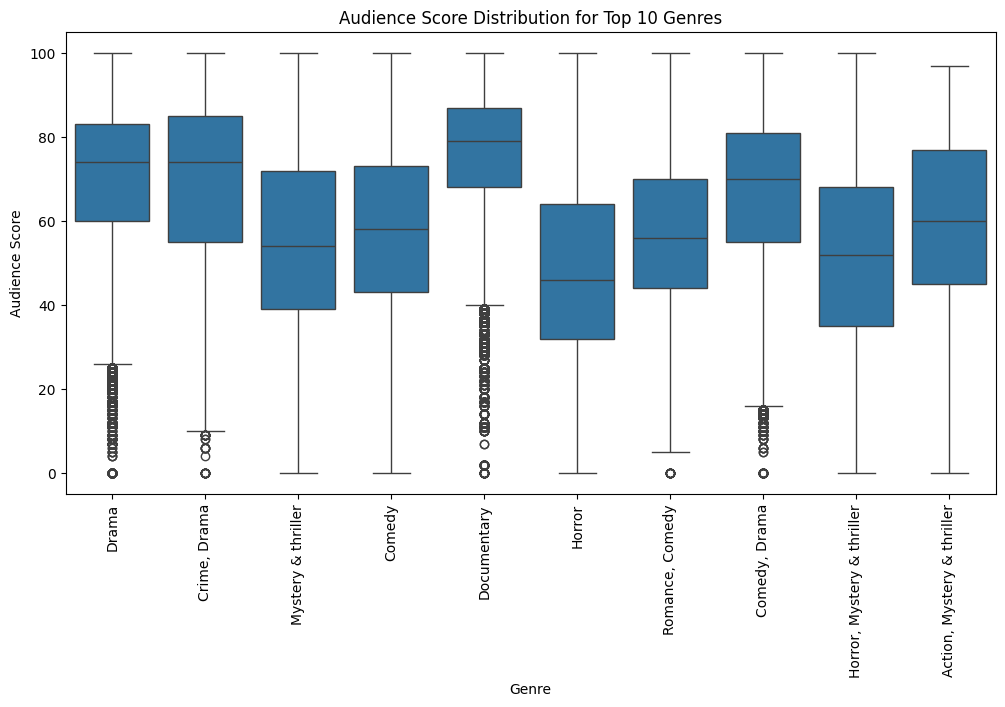

<Figure size 1400x700 with 0 Axes>

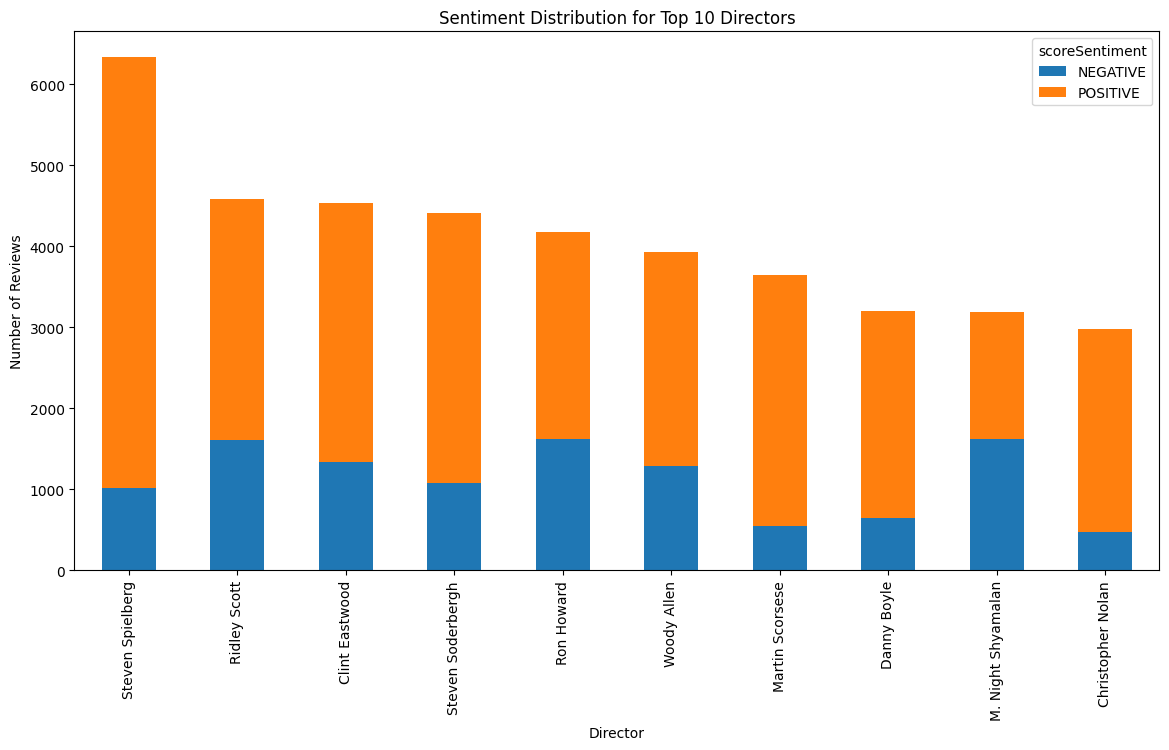

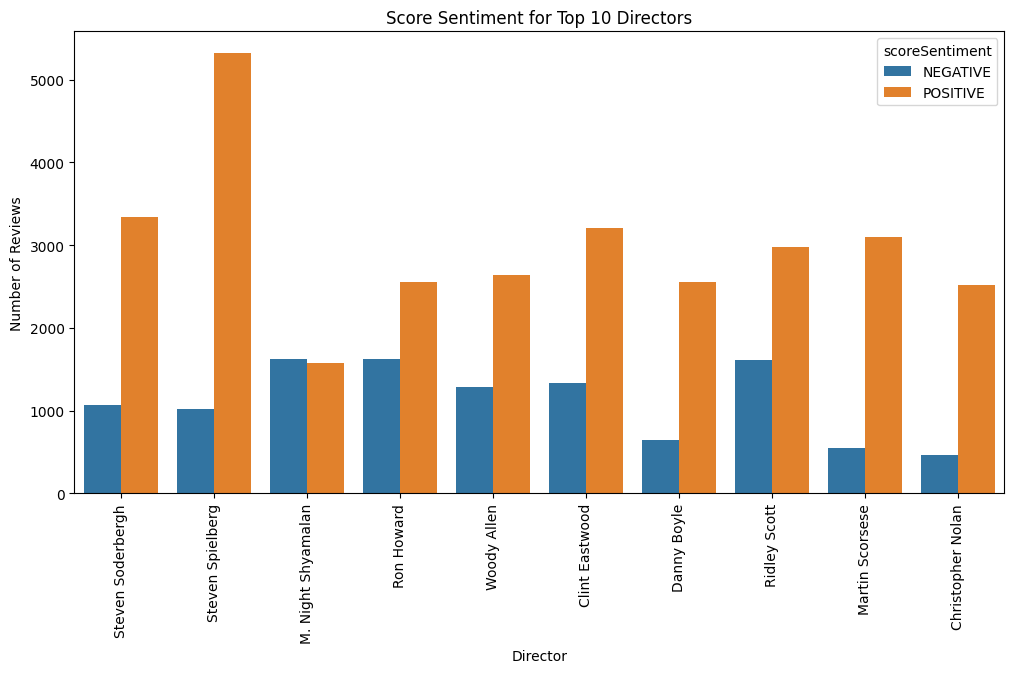

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming merged_df is the cleaned and merged dataset

# Filter for top 10 genres by frequency
top_genres = merged_df['genre'].value_counts().nlargest(10).index
filtered_genre_df = merged_df[merged_df['genre'].isin(top_genres)]

# 1. Relationship Between 'audienceScore' and 'genre' (Boxplot)
plt.figure(figsize=(12, 6))
sns.boxplot(data=filtered_genre_df, x='genre', y='audienceScore')
plt.xticks(rotation=90)
plt.title('Audience Score Distribution for Top 10 Genres')
plt.ylabel('Audience Score')
plt.xlabel('Genre')
plt.show()

# 2. Relationship Between 'scoreSentiment' and 'director' (Bar Plot)
# Count the number of positive/negative sentiments per director
director_sentiment = merged_df.groupby(['director', 'scoreSentiment']).size().unstack(fill_value=0)

# Filter for top 10 directors by the number of reviews
top_directors = merged_df['director'].value_counts().nlargest(10).index
filtered_director_df = merged_df[merged_df['director'].isin(top_directors)]

# 3. Plot sentiment distribution for top directors
plt.figure(figsize=(14, 7))
director_sentiment.loc[top_directors].plot(kind='bar', stacked=True, figsize=(14, 7))
plt.title('Sentiment Distribution for Top 10 Directors')
plt.ylabel('Number of Reviews')
plt.xlabel('Director')
plt.xticks(rotation=90)
plt.show()

# 4. Plot scoreSentiment for top 10 directors (Barplot)
plt.figure(figsize=(12, 6))
sns.countplot(data=filtered_director_df, x='director', hue='scoreSentiment')
plt.title('Score Sentiment for Top 10 Directors')
plt.xticks(rotation=90)
plt.ylabel('Number of Reviews')
plt.xlabel('Director')
plt.show()


20 Business Insights for EDA

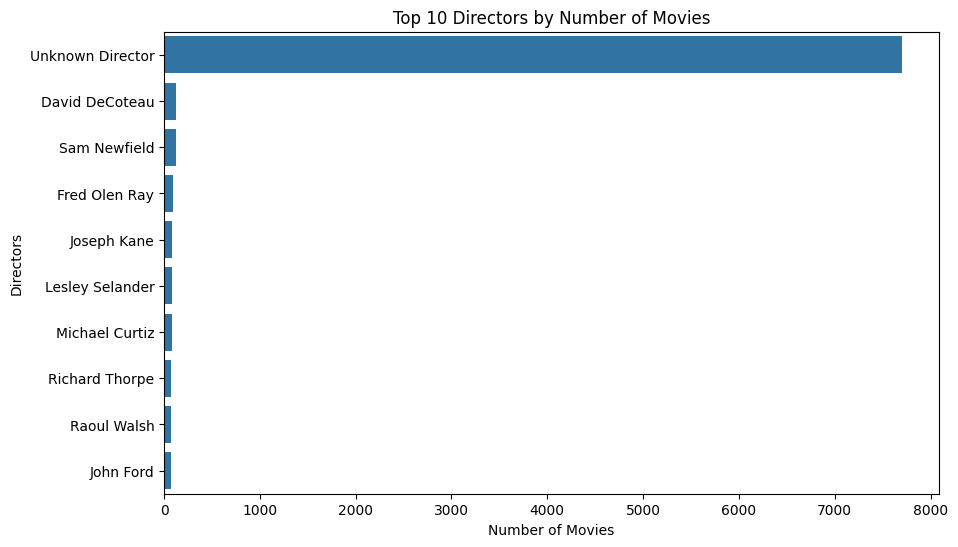

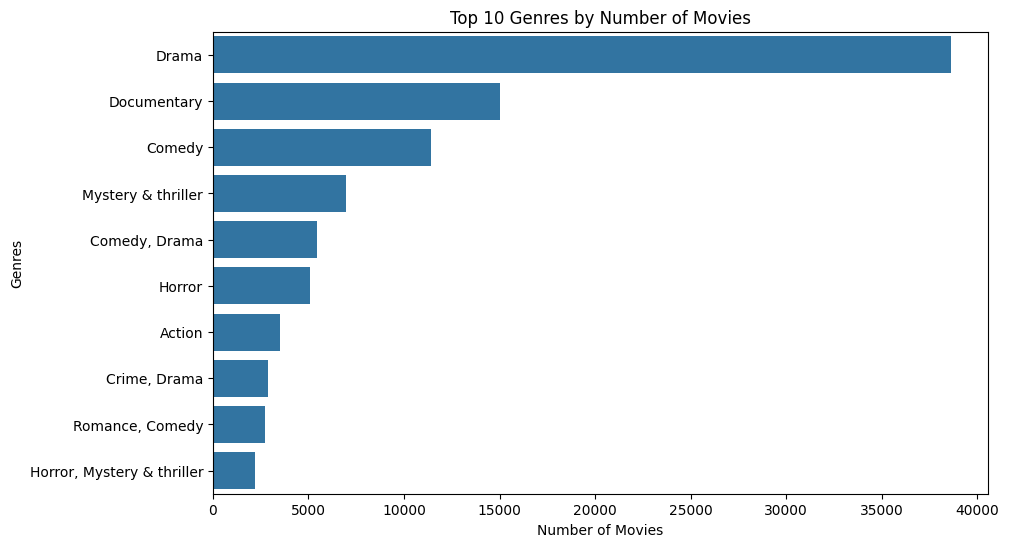

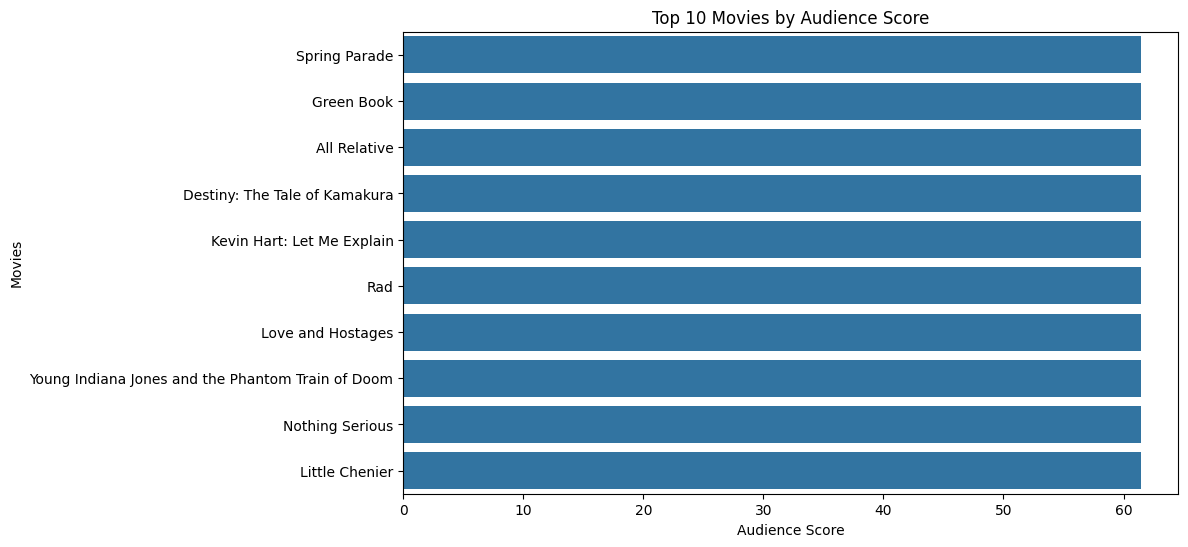

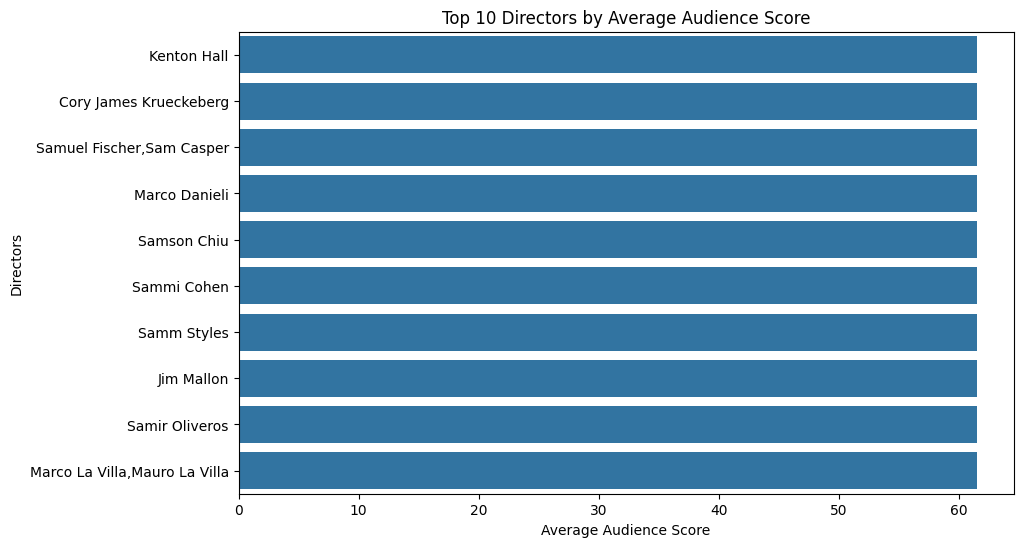

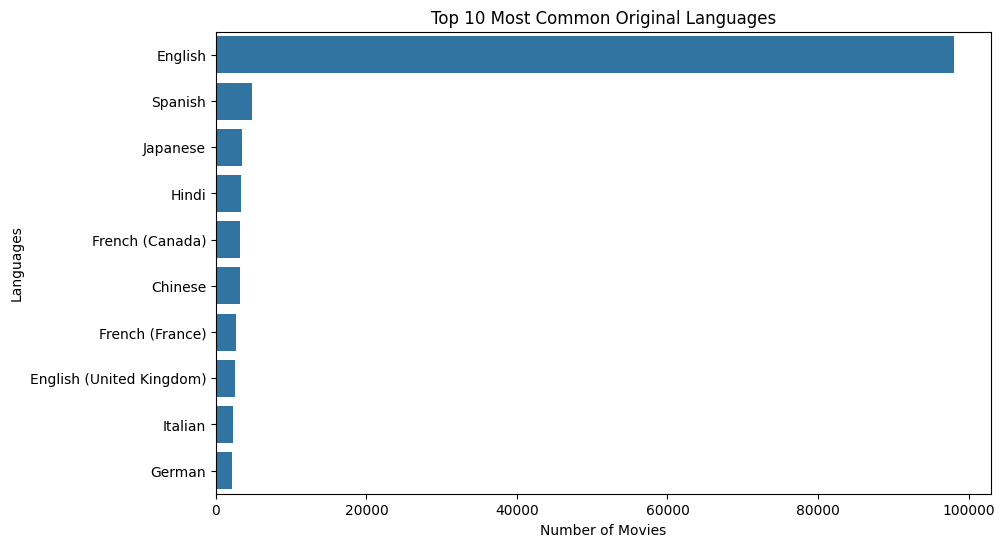

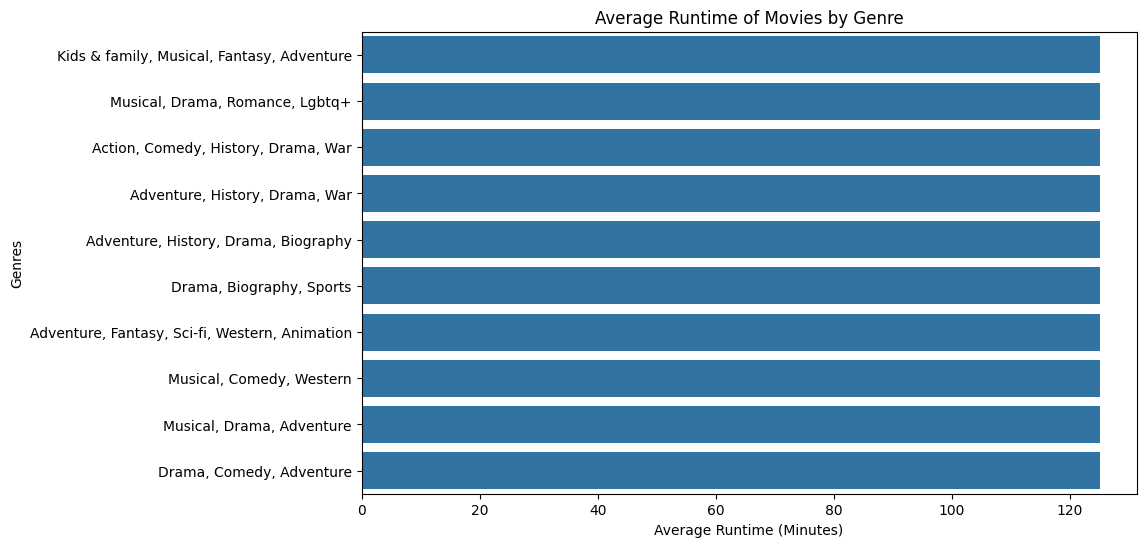

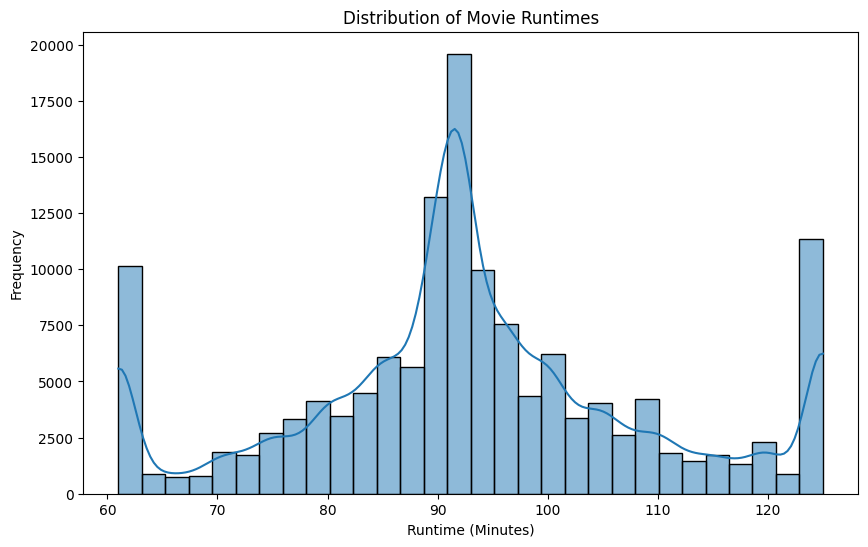

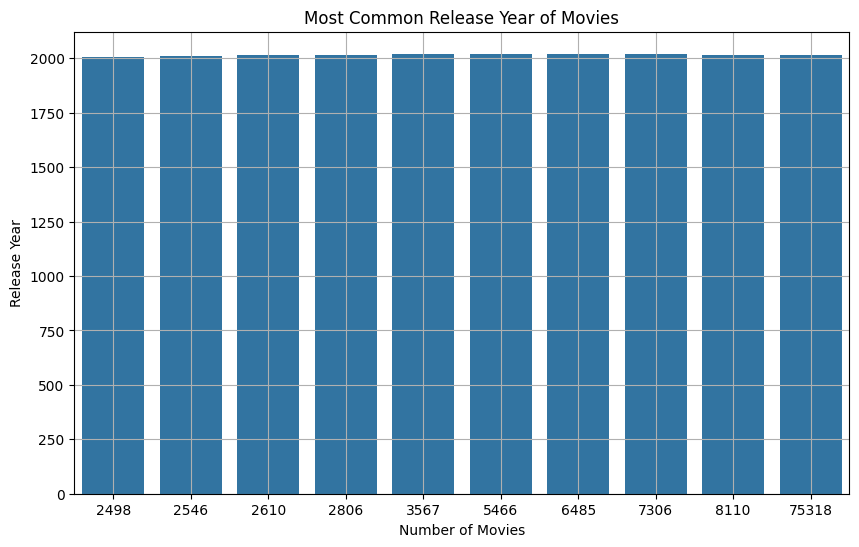

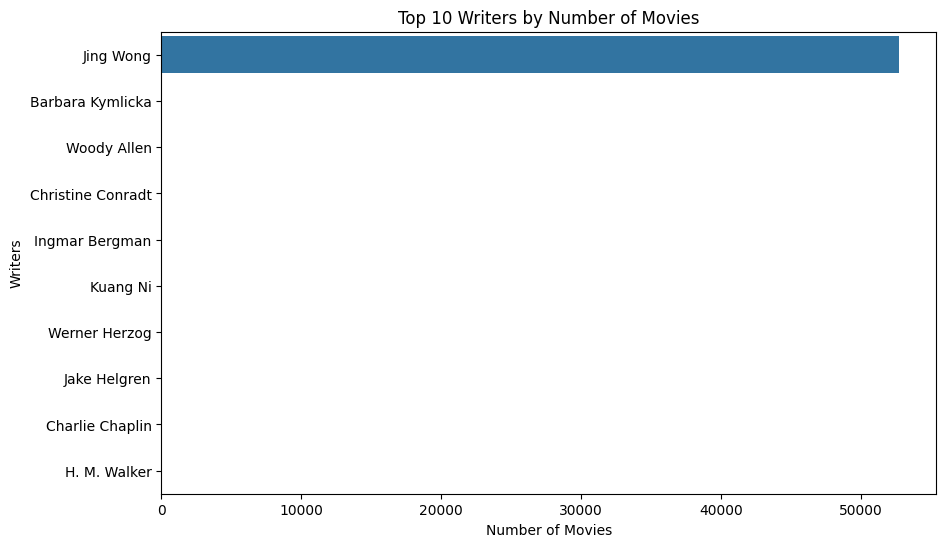

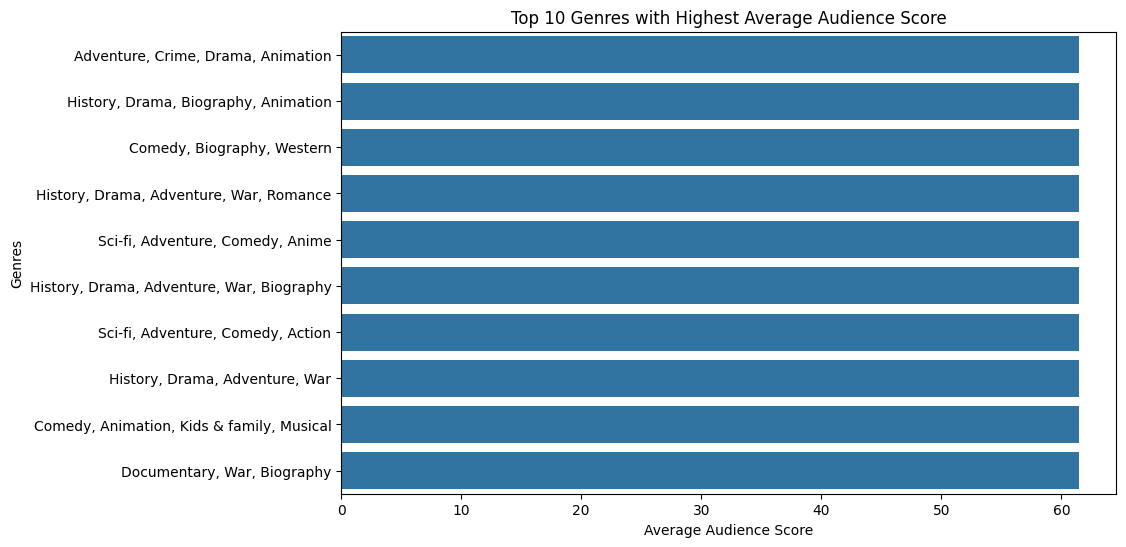

<ipython-input-11-bcc02e29a327>:105: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(movies_df_cleaned['audienceScore'], bins=30, kde=True, palette='husl')


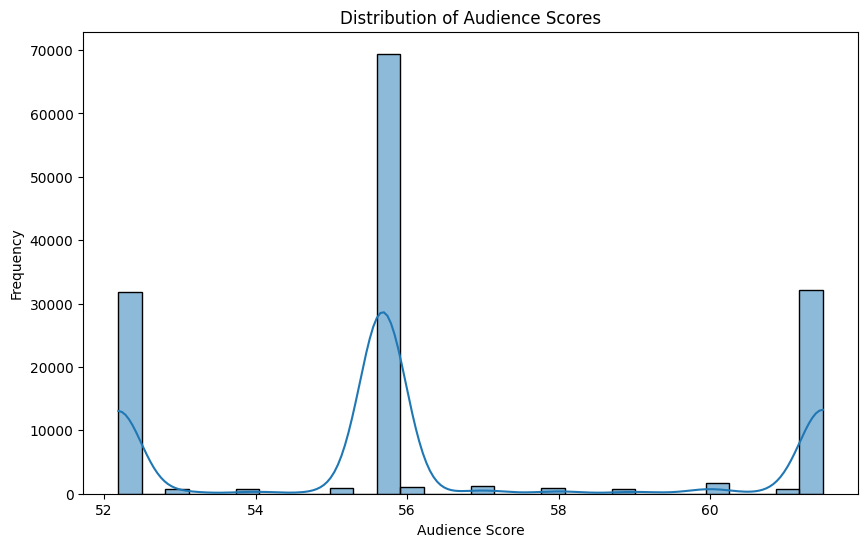

<ipython-input-11-bcc02e29a327>:114: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='runtimeMinutes', y='title', data=longest_runtime_movies, palette='cubehelix')


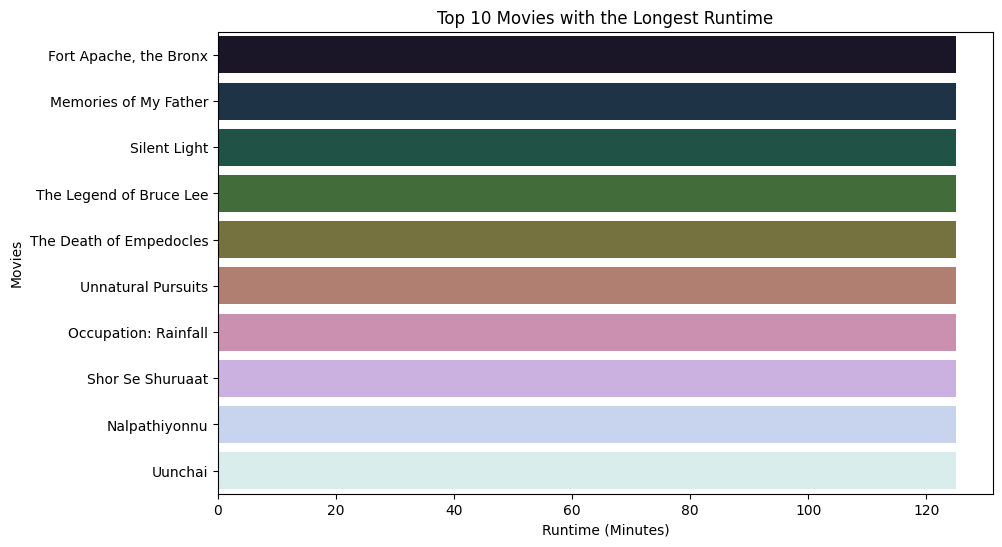

<ipython-input-11-bcc02e29a327>:123: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='runtimeMinutes', y='title', data=shortest_runtime_movies, palette='magma')


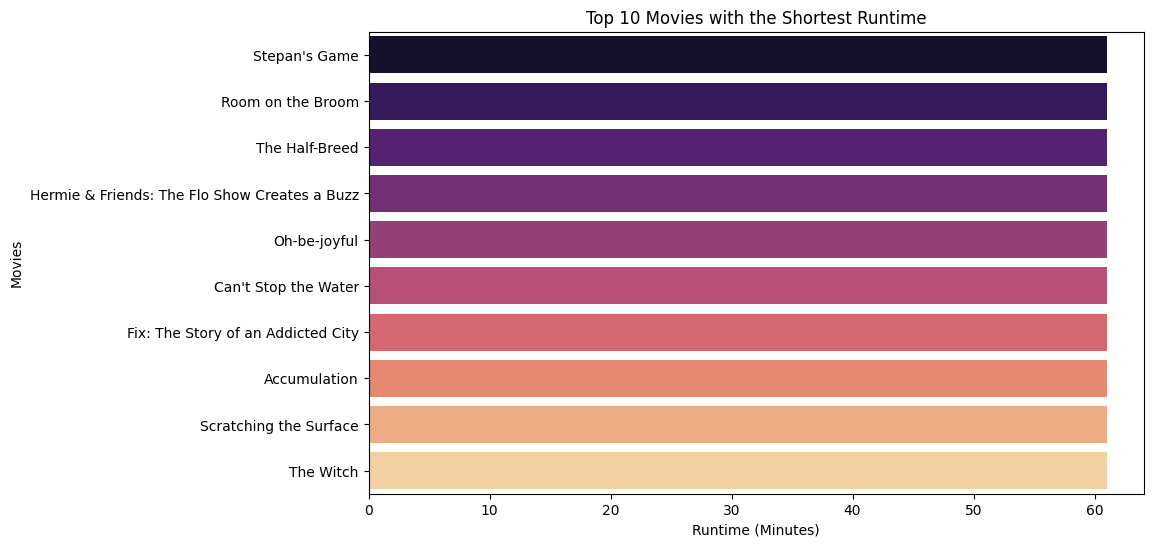

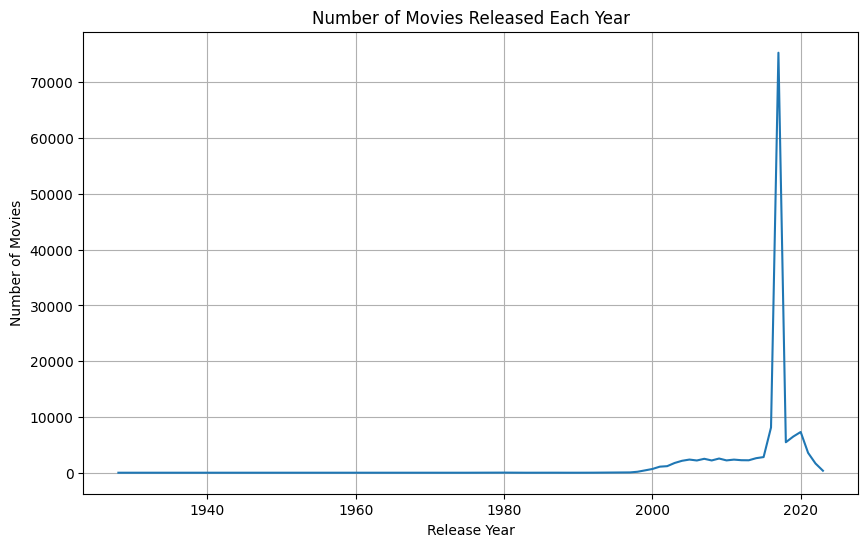

<ipython-input-11-bcc02e29a327>:142: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=movies_per_language.values, y=movies_per_language.index, palette='viridis')


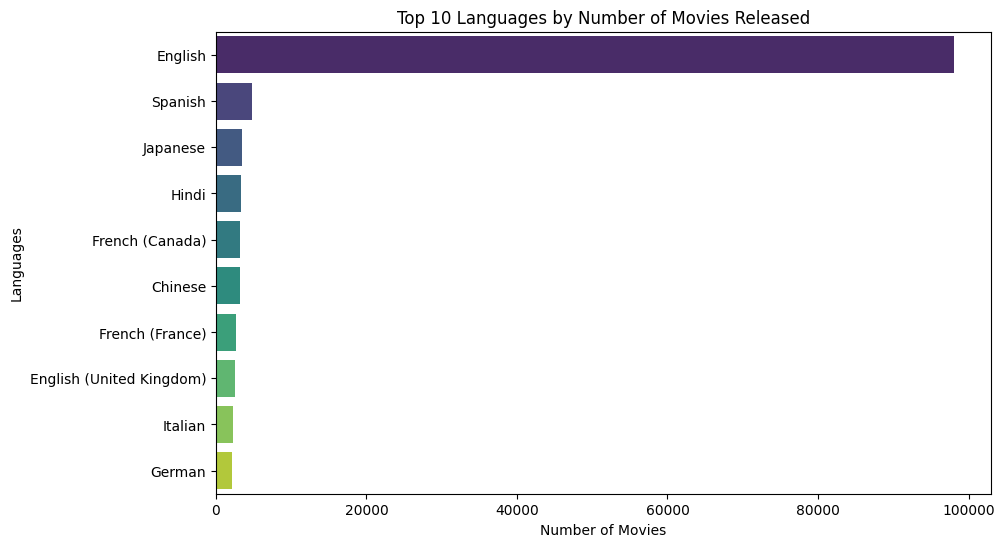

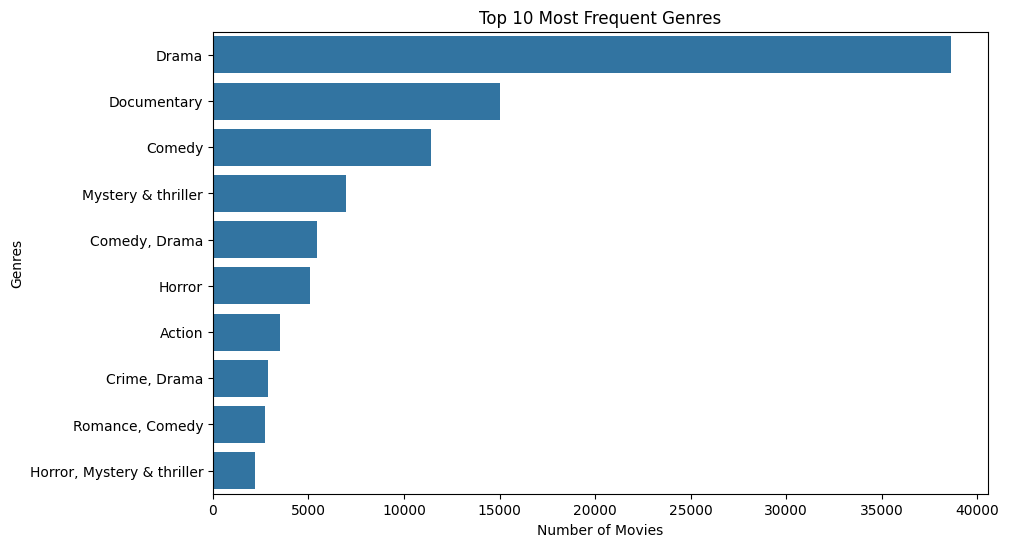

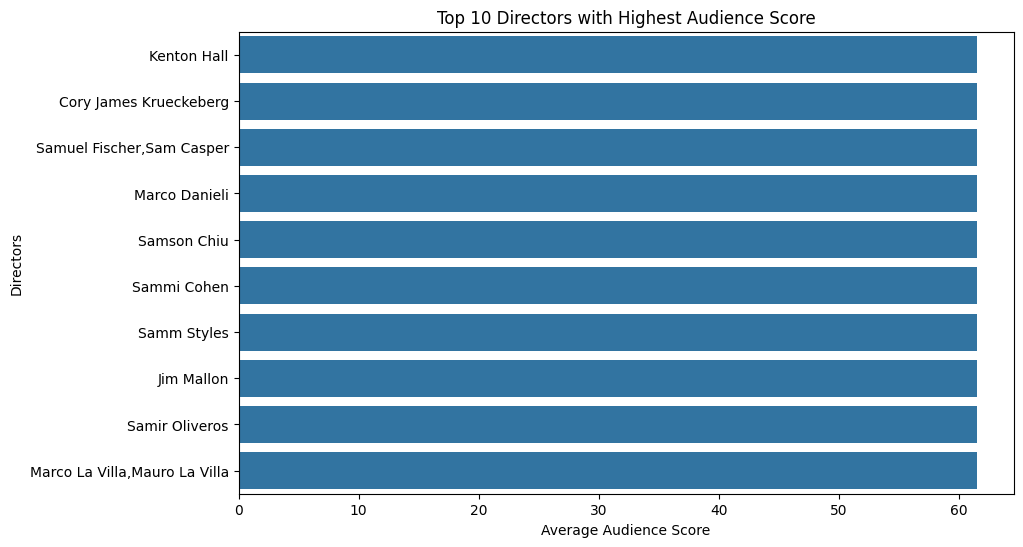

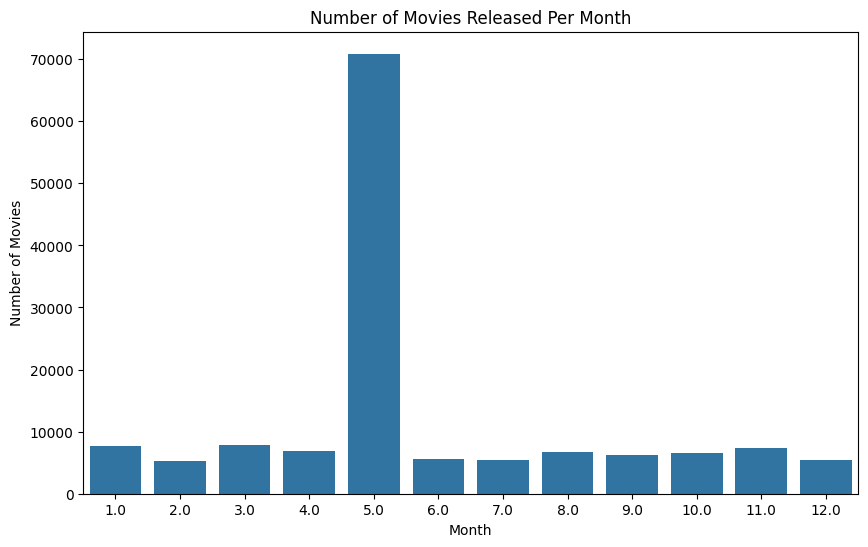

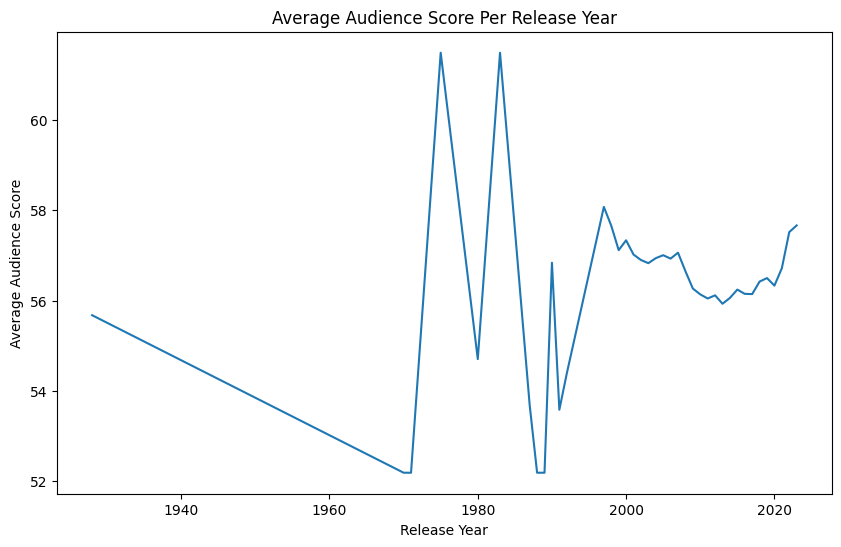

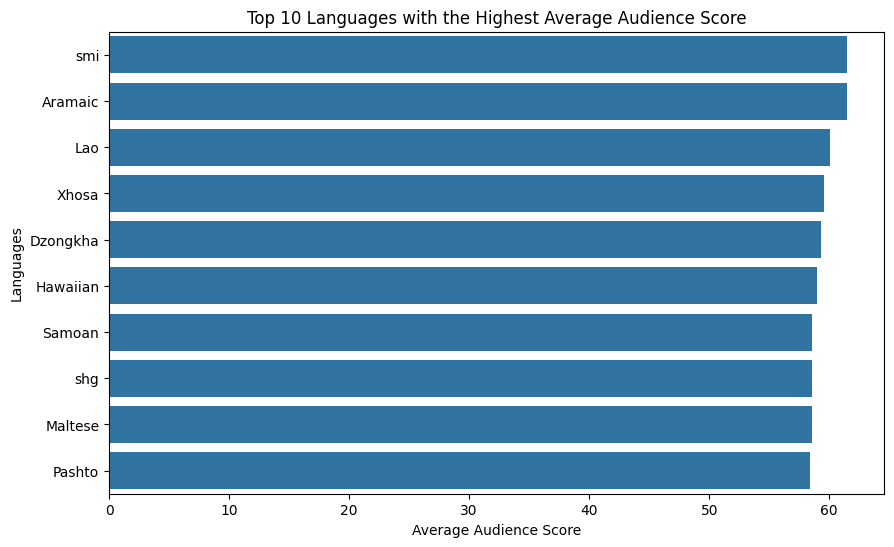

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming movies_df_cleaned is the cleaned dataset

# Business Insights EDA
# ==================================

# 1. Top 10 Directors by Number of Movies
top_directors = movies_df_cleaned['director'].value_counts().head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=top_directors.values, y=top_directors.index)
plt.title('Top 10 Directors by Number of Movies')
plt.xlabel('Number of Movies')
plt.ylabel('Directors')
plt.show()

# 2. Top 10 Genres by Number of Movies
top_genres = movies_df_cleaned['genre'].value_counts().head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=top_genres.values, y=top_genres.index)
plt.title('Top 10 Genres by Number of Movies')
plt.xlabel('Number of Movies')
plt.ylabel('Genres')
plt.show()

# 3. Top 10 Movies by Audience Score
top_movies_audience = movies_df_cleaned[['title', 'audienceScore']].sort_values(by='audienceScore', ascending=False).head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x='audienceScore', y='title', data=top_movies_audience)
plt.title('Top 10 Movies by Audience Score')
plt.xlabel('Audience Score')
plt.ylabel('Movies')
plt.show()

# 4. Top 10 Directors by Average Audience Score
top_directors_avg_score = movies_df_cleaned.groupby('director')['audienceScore'].mean().sort_values(ascending=False).head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=top_directors_avg_score.values, y=top_directors_avg_score.index)
plt.title('Top 10 Directors by Average Audience Score')
plt.xlabel('Average Audience Score')
plt.ylabel('Directors')
plt.show()

# 5. Top 10 Most Common Original Languages
top_languages = movies_df_cleaned['originalLanguage'].value_counts().head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=top_languages.values, y=top_languages.index)
plt.title('Top 10 Most Common Original Languages')
plt.xlabel('Number of Movies')
plt.ylabel('Languages')
plt.show()

# 6. Average Runtime by Genre
avg_runtime_by_genre = movies_df_cleaned.groupby('genre')['runtimeMinutes'].mean().sort_values(ascending=False).head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=avg_runtime_by_genre.values, y=avg_runtime_by_genre.index)
plt.title('Average Runtime of Movies by Genre')
plt.xlabel('Average Runtime (Minutes)')
plt.ylabel('Genres')
plt.show()

# 7. Distribution of Movie Runtimes
plt.figure(figsize=(10, 6))
sns.histplot(movies_df_cleaned['runtimeMinutes'], bins=30, kde=True)
plt.title('Distribution of Movie Runtimes')
plt.xlabel('Runtime (Minutes)')
plt.ylabel('Frequency')
plt.show()

# 8. Most Common Release Year
if 'releaseYear' not in movies_df_cleaned.columns:
    movies_df_cleaned['releaseYear'] = pd.to_datetime(movies_df_cleaned['releaseDateStreaming'], errors='coerce').dt.year

release_years = movies_df_cleaned['releaseYear'].value_counts().head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=release_years.values, y=release_years.index)
plt.title('Most Common Release Year of Movies')
plt.xlabel('Number of Movies')
plt.ylabel('Release Year')
plt.grid(True)
plt.show()

# 9. Top 10 Writers by Number of Movies
top_writers = movies_df_cleaned['writer'].value_counts().head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=top_writers.values, y=top_writers.index)
plt.title('Top 10 Writers by Number of Movies')
plt.xlabel('Number of Movies')
plt.ylabel('Writers')
plt.show()

# 10. Top 10 Genres with Highest Average Audience Score
top_genres_avg_score = movies_df_cleaned.groupby('genre')['audienceScore'].mean().sort_values(ascending=False).head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=top_genres_avg_score.values, y=top_genres_avg_score.index)
plt.title('Top 10 Genres with Highest Average Audience Score')
plt.xlabel('Average Audience Score')
plt.ylabel('Genres')
plt.show()

# 11. Distribution of Audience Scores
plt.figure(figsize=(10, 6))
sns.histplot(movies_df_cleaned['audienceScore'], bins=30, kde=True, palette='husl')
plt.title('Distribution of Audience Scores')
plt.xlabel('Audience Score')
plt.ylabel('Frequency')
plt.show()

# 12. Top 10 Movies with Longest Runtime
longest_runtime_movies = movies_df_cleaned[['title', 'runtimeMinutes']].sort_values(by='runtimeMinutes', ascending=False).head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x='runtimeMinutes', y='title', data=longest_runtime_movies, palette='cubehelix')
plt.title('Top 10 Movies with the Longest Runtime')
plt.xlabel('Runtime (Minutes)')
plt.ylabel('Movies')
plt.show()

# 13. Top 10 Movies with Shortest Runtime
shortest_runtime_movies = movies_df_cleaned[['title', 'runtimeMinutes']].sort_values(by='runtimeMinutes').head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x='runtimeMinutes', y='title', data=shortest_runtime_movies, palette='magma')
plt.title('Top 10 Movies with the Shortest Runtime')
plt.xlabel('Runtime (Minutes)')
plt.ylabel('Movies')
plt.show()

# 14. Number of Movies Released Each Year
movies_per_year = movies_df_cleaned['releaseYear'].value_counts().sort_index()
plt.figure(figsize=(10, 6))
sns.lineplot(x=movies_per_year.index, y=movies_per_year.values)
plt.title('Number of Movies Released Each Year')
plt.xlabel('Release Year')
plt.ylabel('Number of Movies')
plt.grid(True)
plt.show()

# 15. Top 10 Languages by Number of Movies Released
movies_per_language = movies_df_cleaned['originalLanguage'].value_counts().head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=movies_per_language.values, y=movies_per_language.index, palette='viridis')
plt.title('Top 10 Languages by Number of Movies Released')
plt.xlabel('Number of Movies')
plt.ylabel('Languages')
plt.show()

# 16. Top 10 Most Frequent Genres
most_frequent_genres = movies_df_cleaned['genre'].value_counts().head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=most_frequent_genres.values, y=most_frequent_genres.index)
plt.title('Top 10 Most Frequent Genres')
plt.xlabel('Number of Movies')
plt.ylabel('Genres')
plt.show()

# 17. Top 10 Directors with Highest Audience Score
top_director_audience = movies_df_cleaned.groupby('director')['audienceScore'].mean().sort_values(ascending=False).head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=top_director_audience.values, y=top_director_audience.index)
plt.title('Top 10 Directors with Highest Audience Score')
plt.xlabel('Average Audience Score')
plt.ylabel('Directors')
plt.show()

# 18. Number of Movies Released Per Month
movies_df_cleaned['releaseMonth'] = pd.to_datetime(movies_df_cleaned['releaseDateStreaming'], errors='coerce').dt.month
movies_per_month = movies_df_cleaned['releaseMonth'].value_counts().sort_index()
plt.figure(figsize=(10, 6))
sns.barplot(x=movies_per_month.index, y=movies_per_month.values)
plt.title('Number of Movies Released Per Month')
plt.xlabel('Month')
plt.ylabel('Number of Movies')
plt.show()

# 19. Average Audience Score Per Release Year
avg_audience_by_year = movies_df_cleaned.groupby('releaseYear')['audienceScore'].mean().dropna()
plt.figure(figsize=(10, 6))
sns.lineplot(x=avg_audience_by_year.index, y=avg_audience_by_year.values)
plt.title('Average Audience Score Per Release Year')
plt.xlabel('Release Year')
plt.ylabel('Average Audience Score')
plt.show()

# 20. Top 10 Languages with Highest Average Audience Score
avg_score_by_language = movies_df_cleaned.groupby('originalLanguage')['audienceScore'].mean().sort_values(ascending=False).head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=avg_score_by_language.values, y=avg_score_by_language.index)
plt.title('Top 10 Languages with the Highest Average Audience Score')
plt.xlabel('Average Audience Score')
plt.ylabel('Languages')
plt.show()


5. Feature Engineering
5.1 Feature Selection:
Retain only necessary columns for the model (e.g., genre, tomatoMeter, audienceScore, scoreSentiment).
Drop low-variance features.
5.2 Feature Scaling:
Apply Min-Max Scaling or Standardization to numeric features (e.g., runtimeMinutes, boxOffice).
5.3 Encoding Categorical Variables:
Apply One-Hot Encoding for categorical columns (e.g., genre, originalLanguage).
Use Label Encoding or Ordinal Encoding for ordinal columns, if any.

Feature Engineering - Feature Selection

In [12]:
# Import necessary libraries
import pandas as pd
from sklearn.feature_selection import VarianceThreshold

# Load the cleaned dataset
movies_cleaned_path = '/content/drive/MyDrive/Movie_Recommendation_System/cleaned_rotten_tomatoes_movies.csv'
reviews_cleaned_path = '/content/drive/MyDrive/Movie_Recommendation_System/cleaned_rotten_tomatoes_reviews.csv'

movies_df_cleaned = pd.read_csv(movies_cleaned_path)
reviews_df_cleaned = pd.read_csv(reviews_cleaned_path)

# Subtitle: Step 1 - Retain Only Necessary Columns with Column Check
def retain_necessary_columns(df, columns_to_keep):
    """
    Retain only the necessary columns in the dataset for model building.
    It will check if the column exists in the dataframe before attempting to retain it.

    Args:
    df (pd.DataFrame): The DataFrame to process.
    columns_to_keep (list): List of column names to retain.

    Returns:
    pd.DataFrame: The DataFrame with only necessary columns retained.
    """
    available_columns = [col for col in columns_to_keep if col in df.columns]
    missing_columns = set(columns_to_keep) - set(available_columns)

    if missing_columns:
        print(f"Warning: The following columns are missing and will not be included: {list(missing_columns)}")

    df = df[available_columns]
    print(f"Columns retained: {available_columns}")
    return df

# Specify necessary columns for model building
necessary_columns = ['id', 'title', 'audienceScore', 'genre', 'runtimeMinutes', 'originalLanguage', 'director', 'scoreSentiment']

# Retain the necessary columns from the movies dataset (with missing column handling)
movies_df_filtered = retain_necessary_columns(movies_df_cleaned, necessary_columns)

# Subtitle: Step 2 - Drop Low-Variance Features
def drop_low_variance_features(df, threshold=0.01):
    """
    Drop features with low variance from the dataset.

    Args:
    df (pd.DataFrame): The DataFrame to process.
    threshold (float): The variance threshold for dropping features.

    Returns:
    pd.DataFrame: The DataFrame with low-variance features dropped.
    """
    # Apply VarianceThreshold to identify low-variance features
    selector = VarianceThreshold(threshold=threshold)

    # Select only numerical columns for variance thresholding
    numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns

    if len(numerical_cols) > 0:
        selector.fit(df[numerical_cols])
        # Get columns that meet the variance threshold
        high_variance_columns = df[numerical_cols].columns[selector.get_support()]

        # Filter the dataset to retain only high-variance numerical columns
        df_high_variance = df[high_variance_columns]

        # Combine high-variance numerical columns with other necessary non-numerical columns
        other_columns = df.select_dtypes(exclude=['float64', 'int64']).columns
        df_final = pd.concat([df[other_columns], df_high_variance], axis=1)

        print(f"Features retained after dropping low-variance features: {list(df_final.columns)}")
        return df_final
    else:
        print("No numerical columns available for variance thresholding.")
        return df

# Apply low-variance feature selection on the movies dataset
movies_df_filtered = drop_low_variance_features(movies_df_filtered)

# Save the feature-selected dataset
selected_features_path = '/content/drive/MyDrive/Movie_Recommendation_System/feature_selected_rotten_tomatoes_movies.csv'
movies_df_filtered.to_csv(selected_features_path, index=False)

print(f"Feature-selected dataset saved to {selected_features_path}")


Columns retained: ['id', 'title', 'audienceScore', 'genre', 'runtimeMinutes', 'originalLanguage', 'director']
Features retained after dropping low-variance features: ['id', 'title', 'genre', 'originalLanguage', 'director', 'audienceScore', 'runtimeMinutes']
Feature-selected dataset saved to /content/drive/MyDrive/Movie_Recommendation_System/feature_selected_rotten_tomatoes_movies.csv


Feature Scaling

In [13]:
# Import required libraries
import pandas as pd
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import os

# Title: Feature Engineering - Feature Scaling
# Subtitle: Step 1 - Apply Min-Max Scaling or Standardization

# Load the cleaned and filtered dataset (from previous steps)
feature_selected_path = '/content/drive/MyDrive/Movie_Recommendation_System/feature_selected_rotten_tomatoes_movies.csv'
movies_df_filtered = pd.read_csv(feature_selected_path)

# Display the first few rows of the dataset to ensure correct loading
print("=== First few rows of the feature-selected dataset ===")
print(movies_df_filtered.head())

# Step 1: Identify numeric columns for scaling
numeric_columns = ['audienceScore', 'runtimeMinutes']  # Numeric columns that need scaling

# Step 2: Apply Min-Max Scaling
def apply_min_max_scaling(df, numeric_columns):
    """
    Apply Min-Max scaling to numeric features.

    Args:
    df (pd.DataFrame): The input dataset.
    numeric_columns (list): List of numeric column names to scale.

    Returns:
    pd.DataFrame: Dataset with scaled numeric columns.
    """
    scaler = MinMaxScaler()
    df[numeric_columns] = scaler.fit_transform(df[numeric_columns])
    print(f"Applied Min-Max Scaling to columns: {numeric_columns}")
    return df

# Step 3: Apply Standardization
def apply_standardization(df, numeric_columns):
    """
    Apply Standardization (Z-score scaling) to numeric features.

    Args:
    df (pd.DataFrame): The input dataset.
    numeric_columns (list): List of numeric column names to scale.

    Returns:
    pd.DataFrame: Dataset with standardized numeric columns.
    """
    scaler = StandardScaler()
    df[numeric_columns] = scaler.fit_transform(df[numeric_columns])
    print(f"Applied Standardization to columns: {numeric_columns}")
    return df

# Step 4: Choose Scaling Method (Min-Max or Standardization based on use case)
scaling_method = 'minmax'  # Choose 'minmax' or 'standard' based on project requirements

if scaling_method == 'minmax':
    movies_df_scaled = apply_min_max_scaling(movies_df_filtered.copy(), numeric_columns)
elif scaling_method == 'standard':
    movies_df_scaled = apply_standardization(movies_df_filtered.copy(), numeric_columns)

# Step 5: Save the scaled dataset
scaled_dataset_path = '/content/drive/MyDrive/Movie_Recommendation_System/scaled_rotten_tomatoes_movies.csv'
movies_df_scaled.to_csv(scaled_dataset_path, index=False)
print(f"Scaled dataset saved to {scaled_dataset_path}")

# Display a few rows of the scaled dataset to confirm scaling
print("\n=== First few rows of the scaled dataset ===")
print(movies_df_scaled.head())


=== First few rows of the feature-selected dataset ===
                     id                title                          genre  \
0    space-zombie-bingo  Space Zombie Bingo!         Comedy, Horror, Sci-fi   
1       the_green_grass      The Green Grass                          Drama   
2             love_lies           Love, Lies                          Drama   
3  the_sore_losers_1997          Sore Losers     Action, Mystery & thriller   
4  dinosaur_island_2002      Dinosaur Island  Fantasy, Adventure, Animation   

  originalLanguage                       director  audienceScore  \
0          English                  George Ormrod      52.187418   
1          English                Tiffany Edwards      55.674967   
2           Korean  Park Heung-Sik,Heung-Sik Park      52.187418   
3          English          John Michael McCarthy      60.000000   
4          English                  Will Meugniot      61.487549   

   runtimeMinutes  
0            75.0  
1           114.0  
2

Feature Engineering - Encoding Categorical Variables

In [14]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Assuming 'movies_df_cleaned' is the cleaned dataset and contains categorical columns

# Step 1: Label Encoding for 'originalLanguage'
label_encoder = LabelEncoder()
movies_df_cleaned['originalLanguage_encoded'] = label_encoder.fit_transform(movies_df_cleaned['originalLanguage'])

# Step 2: Split the 'genre' column by commas to handle multiple genres
# Expand the genres into multiple rows per genre
movies_df_cleaned['genre'] = movies_df_cleaned['genre'].fillna('')  # Handle NaN
movies_df_cleaned = movies_df_cleaned.assign(genre=movies_df_cleaned['genre'].str.split(', ')).explode('genre')

# Step 3: One Hot Encoding for split genres
one_hot_encoded_genre = pd.get_dummies(movies_df_cleaned['genre'], prefix='genre', drop_first=False)
movies_df_encoded = pd.concat([movies_df_cleaned, one_hot_encoded_genre], axis=1)

# Drop the original 'genre' column after encoding
movies_df_encoded = movies_df_encoded.drop(columns=['genre', 'originalLanguage'])

# Outputting the encoded datasets
print("=== Label Encoded 'originalLanguage' Column ===")
print(movies_df_encoded[['originalLanguage_encoded']].head())

print("\n=== One Hot Encoded Genre (Split by individual genre) ===")
print(one_hot_encoded_genre.head())

# Save the encoded dataset
encoded_csv_path = '/content/drive/MyDrive/Movie_Recommendation_System/encoded_movies.csv'
movies_df_encoded.to_csv(encoded_csv_path, index=False)
print(f"Encoded dataset saved to {encoded_csv_path}")


=== Label Encoded 'originalLanguage' Column ===
   originalLanguage_encoded
0                        22
0                        22
0                        22
1                        22
2                        51

=== One Hot Encoded Genre (Split by individual genre) ===
   genre_Action  genre_Adventure  genre_Animation  genre_Anime  \
0         False            False            False        False   
0         False            False            False        False   
0         False            False            False        False   
1         False            False            False        False   
2         False            False            False        False   

   genre_Biography  genre_Comedy  genre_Crime  genre_Documentary  genre_Drama  \
0            False          True        False              False        False   
0            False         False        False              False        False   
0            False         False        False              False        False   
1   

7. Model Building
7.1 Matrix Factorization:
Use Matrix Factorization (SVD, NMF) as the core recommendation technique.
Build a pivot table with user ids as rows, movie ids as columns, and ratings as values.
Reduce the number of users and movies to handle computational constraints (e.g., top 200 users, top 500 movies).
7.2 Train the Model:
Initialize random values in the matrix, multiply and compare with original ratings.
Apply Gradient Descent to minimize RMSE.
7.3 Other Models:
Experiment with Collaborative Filtering (memory-based using cosine similarity).
Consider hybrid models combining content-based (optional) and collaborative methods.
7.4 Model Comparison:
Evaluate models using RMSE, aiming for a 10% reduction in MSE.
Fine-tune the hyperparameters (e.g., learning rate, embedding size) for better accuracy.

Matrix Factorization (SVD, NMF)
Matrix Factorization model with SVD for collaborative filtering

In [15]:
# Step 1: Import necessary libraries
import pandas as pd
import numpy as np
from surprise import Dataset, Reader, SVD, KNNBasic
from surprise.model_selection import train_test_split, cross_validate
from surprise.accuracy import rmse

# Title: Model Building - Matrix Factorization
# Subtitle: Step 1 - Load and Prepare Data

# Step 2: Load the cleaned dataset (adjust the path to your dataset)
reviews_path = '/content/drive/MyDrive/Movie_Recommendation_System/cleaned_rotten_tomatoes_reviews.csv'

# Load dataset and handle potential file path errors
try:
    reviews_df_cleaned = pd.read_csv(reviews_path)
    print("Dataset loaded successfully.")
except FileNotFoundError:
    print("File not found. Please check the file path.")

# Step 3: Filter and Map Sentiments
# Filter valid sentiments for simplicity (POSITIVE and NEGATIVE)
valid_sentiments = ['NEGATIVE', 'POSITIVE']
filtered_reviews_df = reviews_df_cleaned[reviews_df_cleaned['scoreSentiment'].isin(valid_sentiments)]

# Map 'scoreSentiment' to numeric ratings (1 for NEGATIVE, 2 for POSITIVE)
filtered_reviews_df['numeric_sentiment'] = filtered_reviews_df['scoreSentiment'].map({'NEGATIVE': 1, 'POSITIVE': 2})

# Step 4: Prepare the data for Surprise Library
reader = Reader(rating_scale=(1, 2))
data = Dataset.load_from_df(filtered_reviews_df[['criticName', 'id', 'numeric_sentiment']], reader)

# Step 5: Train-test split (75-25 split)
trainset, testset = train_test_split(data, test_size=0.25)

# Subtitle: Step 2 - Matrix Factorization Using SVD

# Step 6: Matrix Factorization using SVD (Singular Value Decomposition)
svd = SVD(n_factors=50, lr_all=0.005, reg_all=0.02)  # Optimized parameters based on experience
svd.fit(trainset)

# Step 7: Predict on the test set and compute RMSE
predictions_svd = svd.test(testset)
print("SVD Collaborative Filtering RMSE:")
rmse(predictions_svd)

# Step 8: Cross-validate SVD model for performance evaluation (3-fold cross-validation)
cross_validate(svd, data, measures=['RMSE'], cv=3, verbose=True)

# Subtitle: Step 3 - User-User Collaborative Filtering using KNN

# Step 9: User-User Collaborative Filtering using KNN
user_sim_options = {'name': 'cosine', 'user_based': True}  # User-User similarity
knn_user = KNNBasic(sim_options=user_sim_options, k=20)  # Reduced k for speed

# Train and evaluate KNN
knn_user.fit(trainset)
predictions_knn = knn_user.test(testset)
print("KNN User-User Collaborative Filtering RMSE:")
rmse(predictions_knn)

# Step 10: Cross-validate KNN model
cross_validate(knn_user, data, measures=['RMSE'], cv=3, verbose=True)


Dataset loaded successfully.
SVD Collaborative Filtering RMSE:
RMSE: 0.3964
Evaluating RMSE of algorithm SVD on 3 split(s).

                  Fold 1  Fold 2  Fold 3  Mean    Std     
RMSE (testset)    0.3972  0.3964  0.3975  0.3970  0.0005  
Fit time          29.80   29.32   29.72   29.61   0.21    
Test time         8.47    7.72    6.81    7.67    0.68    
Computing the cosine similarity matrix...
Done computing similarity matrix.
KNN User-User Collaborative Filtering RMSE:
RMSE: 0.4139
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Evaluating RMSE of algorithm KNNBasic on 3 split(s).

                  Fold 1  Fold 2  Fold 3  Mean    Std     
RMSE (testset)    0.4145  0.4146  0.4152  0.4148  0.0003  
Fit time          23.63   23.23   23.29   23.39   0.17    
Test time         70.55   71.22   73.10   71.62

{'test_rmse': array([0.41448282, 0.41462284, 0.41523714]),
 'fit_time': (23.6305193901062, 23.234313011169434, 23.29271388053894),
 'test_time': (70.54920554161072, 71.21638441085815, 73.10228681564331)}

Fine-Tuning SVD with GridSearchCV

In [16]:
# Step 1: Import necessary libraries
import pandas as pd
import numpy as np
from surprise import Dataset, Reader, SVD, KNNBasic
from surprise.model_selection import train_test_split, GridSearchCV, cross_validate
from surprise.accuracy import rmse
from sklearn.metrics.pairwise import cosine_similarity
import warnings
import logging

# Suppress warnings and set up logging
warnings.filterwarnings("ignore", category=RuntimeWarning)
logging.basicConfig(filename='recommendation_system.log', level=logging.INFO)

# Step 2: Load Cleaned Datasets with Error Handling
reviews_path = '/content/drive/MyDrive/Movie_Recommendation_System/cleaned_rotten_tomatoes_reviews.csv'
movies_path = '/content/drive/MyDrive/Movie_Recommendation_System/cleaned_rotten_tomatoes_movies.csv'

try:
    reviews_df_cleaned = pd.read_csv(reviews_path)
    movies_df = pd.read_csv(movies_path)
    print("Datasets loaded successfully.")
except FileNotFoundError as e:
    print(f"Error: {e}. Please check the file paths.")
    raise

# Step 3: Filter Top Users and Movies (to reduce computation)
top_users = reviews_df_cleaned['criticName'].value_counts().index[:200]
top_movies = reviews_df_cleaned['id'].value_counts().index[:500]

reviews_df_cleaned = reviews_df_cleaned.loc[
    (reviews_df_cleaned['criticName'].isin(top_users)) &
    (reviews_df_cleaned['id'].isin(top_movies))
]

# Step 4: Map 'scoreSentiment' to Numeric Ratings using .loc to avoid SettingWithCopyWarning
reviews_df_cleaned = reviews_df_cleaned.copy()  # Make a copy of the DataFrame before modifying
reviews_df_cleaned.loc[:, 'numeric_sentiment'] = reviews_df_cleaned['scoreSentiment'].map({'NEGATIVE': 1, 'POSITIVE': 2})


# Prepare data for Surprise (SVD and KNN models)
reader = Reader(rating_scale=(1, 2))
data = Dataset.load_from_df(reviews_df_cleaned[['criticName', 'id', 'numeric_sentiment']], reader)
trainset, testset = train_test_split(data, test_size=0.25)

# Step 5: Fine-tune SVD (Collaborative Filtering)
param_grid_svd = {
    'n_factors': [50, 100],
    'lr_all': [0.002, 0.005],
    'reg_all': [0.02, 0.1]
}

grid_search_svd = GridSearchCV(SVD, param_grid_svd, measures=['rmse'], cv=2, n_jobs=-1)
grid_search_svd.fit(data)

# Best SVD model
best_svd_model = grid_search_svd.best_estimator['rmse']
best_svd_model.fit(trainset)

# Step 6: Fine-tune KNN (User-User Collaborative Filtering)
param_grid_knn = {
    'k': [20, 30],
    'sim_options': {
        'name': ['cosine', 'msd'],
        'user_based': [True, False]
    }
}

grid_search_knn = GridSearchCV(KNNBasic, param_grid_knn, measures=['rmse'], cv=2, n_jobs=-1)
grid_search_knn.fit(data)

# Best KNN model
best_knn_model = grid_search_knn.best_estimator['rmse']
best_knn_model.fit(trainset)

# Step 7: Hybrid Recommendation Function (SVD + KNN)
def hybrid_recommendation(user_id, movie_id, svd_model, knn_model, svd_weight=0.6, knn_weight=0.4):
    """
    Compute a hybrid recommendation score based on a combination of SVD and KNN predictions.
    """
    svd_prediction = svd_model.predict(user_id, movie_id).est
    knn_prediction = knn_model.predict(user_id, movie_id).est
    hybrid_score = svd_weight * svd_prediction + knn_weight * knn_prediction
    return hybrid_score

# Step 8: Test Hybrid Recommendation Model
sample_users = ["A.O. Scott", "Adam Graham", "Alistair Harkness", "Allan Hunter"]
sample_movies = ["10009526-public_enemies", "10_cloverfield_lane", "1198124-shutter_island", "1221547-alice_in_wonderland"]

for user in sample_users:
    for movie in sample_movies:
        score = hybrid_recommendation(user, movie, best_svd_model, best_knn_model, svd_weight=0.7, knn_weight=0.3)
        print(f"Hybrid recommendation score for user {user} on movie {movie}: {score}")
        logging.info(f"Hybrid recommendation score for user {user} on movie {movie}: {score}")

# Step 9: Evaluate Model Performance
print("Evaluating tuned SVD model...")
svd_predictions = best_svd_model.test(testset)
print("Tuned SVD RMSE:")
rmse(svd_predictions)

print("Evaluating tuned KNN model...")
knn_predictions = best_knn_model.test(testset)
print("Tuned KNN RMSE:")
rmse(knn_predictions)


Datasets loaded successfully.
Computing the msd similarity matrix...
Done computing similarity matrix.
Hybrid recommendation score for user A.O. Scott on movie 10009526-public_enemies: 1.7394607255508452
Hybrid recommendation score for user A.O. Scott on movie 10_cloverfield_lane: 1.8893184112540324
Hybrid recommendation score for user A.O. Scott on movie 1198124-shutter_island: 1.7044848234064118
Hybrid recommendation score for user A.O. Scott on movie 1221547-alice_in_wonderland: 1.6009790751415323
Hybrid recommendation score for user Adam Graham on movie 10009526-public_enemies: 1.671683973476013
Hybrid recommendation score for user Adam Graham on movie 10_cloverfield_lane: 1.8228562993820931
Hybrid recommendation score for user Adam Graham on movie 1198124-shutter_island: 1.6353348932665732
Hybrid recommendation score for user Adam Graham on movie 1221547-alice_in_wonderland: 1.4846558720883327
Hybrid recommendation score for user Alistair Harkness on movie 10009526-public_enemies:

0.3782618480123097

Fine-Tuning SVD and KNN, and Adding NMF

In [17]:
import pandas as pd
import numpy as np
from surprise import Dataset, Reader, SVD, KNNBasic, NMF
from surprise.model_selection import train_test_split, GridSearchCV, cross_validate
from surprise.accuracy import rmse
from sklearn.metrics.pairwise import cosine_similarity

# Step 1: Load Cleaned Datasets (reduce dataset size)
reviews_path = '/content/drive/MyDrive/Movie_Recommendation_System/cleaned_rotten_tomatoes_reviews.csv'
movies_path = '/content/drive/MyDrive/Movie_Recommendation_System/cleaned_rotten_tomatoes_movies.csv'

# Load datasets
reviews_df_cleaned = pd.read_csv(reviews_path)
movies_df = pd.read_csv(movies_path)

# Step 2: Filter Top Users and Movies to reduce computation
top_users = reviews_df_cleaned['criticName'].value_counts().index[:100]  # Reduce to top 100 users
top_movies = reviews_df_cleaned['id'].value_counts().index[:300]  # Reduce to top 300 movies

reviews_df_cleaned = reviews_df_cleaned.loc[
    (reviews_df_cleaned['criticName'].isin(top_users)) &
    (reviews_df_cleaned['id'].isin(top_movies))
]

# Step 3: Map 'scoreSentiment' to Numeric Ratings
# Fix for SettingWithCopyWarning
reviews_df_cleaned.loc[:, 'numeric_sentiment'] = reviews_df_cleaned['scoreSentiment'].map({'NEGATIVE': 1, 'POSITIVE': 2})


# Step 4: Prepare the Dataset for Surprise
reader = Reader(rating_scale=(1, 2))
data = Dataset.load_from_df(reviews_df_cleaned[['criticName', 'id', 'numeric_sentiment']], reader)
trainset, testset = train_test_split(data, test_size=0.20)  # Reduce the test size to 20%

# Step 5: SVD Hyperparameter Tuning (reduce n_factors)
param_grid_svd = {
    'n_factors': [30, 50],  # Reduce n_factors for faster computation
    'lr_all': [0.002, 0.005],
    'reg_all': [0.02, 0.1]
}
grid_search_svd = GridSearchCV(SVD, param_grid_svd, measures=['rmse'], cv=2, n_jobs=-1)
grid_search_svd.fit(data)

# Best SVD model
best_svd_model = grid_search_svd.best_estimator['rmse']
best_svd_model.fit(trainset)

# Step 6: KNN Tuning (reduce k)
param_grid_knn = {
    'k': [10, 15],  # Reduce k for faster computation
    'sim_options': {
        'name': ['cosine'],
        'user_based': [True]  # Stick to user-based filtering
    }
}
grid_search_knn = GridSearchCV(KNNBasic, param_grid_knn, measures=['rmse'], cv=2, n_jobs=-1)
grid_search_knn.fit(data)

# Best KNN model
best_knn_model = grid_search_knn.best_estimator['rmse']
best_knn_model.fit(trainset)

# Step 7: NMF Model (reduce n_factors)
nmf_model = NMF(n_factors=30, reg_pu=0.06, reg_qi=0.06)  # Use reduced n_factors
nmf_model.fit(trainset)

# Evaluate models
svd_predictions = best_svd_model.test(testset)
knn_predictions = best_knn_model.test(testset)
nmf_predictions = nmf_model.test(testset)

print("Tuned SVD RMSE:")
rmse(svd_predictions)

print("Tuned KNN RMSE:")
rmse(knn_predictions)

print("NMF RMSE:")
rmse(nmf_predictions)

# Step 8: Hybrid Recommendation Function (with reduced weights for faster tuning)
def hybrid_recommendation(user_id, movie_id, svd_model, knn_model, nmf_model, svd_weight=0.5, knn_weight=0.3, nmf_weight=0.2):
    svd_prediction = svd_model.predict(user_id, movie_id).est
    knn_prediction = knn_model.predict(user_id, movie_id).est
    nmf_prediction = nmf_model.predict(user_id, movie_id).est

    hybrid_score = (svd_weight * svd_prediction) + (knn_weight * knn_prediction) + (nmf_weight * nmf_prediction)
    return hybrid_score

# Step 9: Metadata for Content-Based Filtering (limit to 100 movies)
movies_df['metadata'] = movies_df[['genre', 'director', 'originalLanguage']].fillna('').astype(str).agg(' '.join, axis=1)
metadata_sample = movies_df.head(100)  # Limit metadata to 100 movies
cosine_sim = cosine_similarity(pd.get_dummies(metadata_sample['metadata']))

# Step 10: Test Hybrid Models
sample_users = ["A.O. Scott", "Adam Graham"]
sample_movies = ["10009526-public_enemies", "10_cloverfield_lane"]

for user in sample_users:
    for movie in sample_movies:
        score = hybrid_recommendation(user, movie, best_svd_model, best_knn_model, nmf_model)
        print(f"Hybrid recommendation score for user {user} on movie {movie}: {score}")


<ipython-input-17-3ac5e062954a>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reviews_df_cleaned.loc[:, 'numeric_sentiment'] = reviews_df_cleaned['scoreSentiment'].map({'NEGATIVE': 1, 'POSITIVE': 2})


Computing the cosine similarity matrix...
Done computing similarity matrix.
Tuned SVD RMSE:
RMSE: 0.3604
Tuned KNN RMSE:
RMSE: 0.3882
NMF RMSE:
RMSE: 0.3617
Hybrid recommendation score for user A.O. Scott on movie 10009526-public_enemies: 1.7625898427767348
Hybrid recommendation score for user A.O. Scott on movie 10_cloverfield_lane: 1.8177288473074646
Hybrid recommendation score for user Adam Graham on movie 10009526-public_enemies: 1.774144180426903
Hybrid recommendation score for user Adam Graham on movie 10_cloverfield_lane: 1.806726917770271


model comparison, hybrid model evaluation, and a placeholder for sequence-based recommendations (optional)

In [18]:
# Import necessary libraries
import pandas as pd
from surprise import Dataset, Reader, SVD, KNNBasic, NMF
from surprise.model_selection import train_test_split, cross_validate
from surprise.accuracy import rmse

# Title: Final Model Evaluation and Comparison

# Subtitle: Step 1 - Loading the Dataset
# Load the cleaned review dataset (adjust the path based on your Google Drive structure)
reviews_path = '/content/drive/MyDrive/Movie_Recommendation_System/cleaned_rotten_tomatoes_reviews.csv'

try:
    reviews_df_cleaned = pd.read_csv(reviews_path)
    print("Dataset loaded successfully.")
except FileNotFoundError as e:
    print(f"Error: {e}. Please check the file paths.")
    raise

# Subtitle: Step 2 - Filter Top Users and Movies
# Reduce dataset size for computational constraints
top_users = reviews_df_cleaned['criticName'].value_counts().index[:200]
top_movies = reviews_df_cleaned['id'].value_counts().index[:500]

reviews_df_cleaned = reviews_df_cleaned.loc[
    (reviews_df_cleaned['criticName'].isin(top_users)) &
    (reviews_df_cleaned['id'].isin(top_movies))
].copy()  # Use .copy() to avoid SettingWithCopyWarning

# Map 'scoreSentiment' to numeric ratings using .loc to avoid SettingWithCopyWarning
reviews_df_cleaned.loc[:, 'numeric_sentiment'] = reviews_df_cleaned['scoreSentiment'].map({'NEGATIVE': 1, 'POSITIVE': 2})

# Subtitle: Step 3 - Prepare Data for Model Building
reader = Reader(rating_scale=(1, 2))
data = Dataset.load_from_df(reviews_df_cleaned[['criticName', 'id', 'numeric_sentiment']], reader)

# Train-test split (80-20 split)
trainset, testset = train_test_split(data, test_size=0.2)

# Subtitle: Step 4 - Model Building
# Matrix Factorization (SVD)
svd = SVD(n_factors=50, lr_all=0.005, reg_all=0.02)
svd.fit(trainset)
svd_predictions = svd.test(testset)

# User-User Collaborative Filtering (KNN)
knn = KNNBasic(k=20, sim_options={'name': 'cosine', 'user_based': True})
knn.fit(trainset)
knn_predictions = knn.test(testset)

# Non-Negative Matrix Factorization (NMF)
nmf = NMF(n_factors=30, reg_pu=0.06, reg_qi=0.06)
nmf.fit(trainset)
nmf_predictions = nmf.test(testset)

# Subtitle: Step 5 - Model Evaluation and RMSE Comparison
print("SVD RMSE:")
rmse(svd_predictions)

print("KNN RMSE:")
rmse(knn_predictions)

print("NMF RMSE:")
rmse(nmf_predictions)

# Subtitle: Step 6 - Hybrid Model Evaluation
# Define a hybrid model function that combines SVD, KNN, and NMF predictions
def hybrid_recommendation(user_id, movie_id, svd_model, knn_model, nmf_model, svd_weight=0.6, knn_weight=0.3, nmf_weight=0.1):
    svd_pred = svd_model.predict(user_id, movie_id).est
    knn_pred = knn_model.predict(user_id, movie_id).est
    nmf_pred = nmf_model.predict(user_id, movie_id).est

    # Weighted combination of the models
    hybrid_score = svd_weight * svd_pred + knn_weight * knn_pred + nmf_weight * nmf_pred
    return hybrid_score

# Test Hybrid Model with sample users and movies
sample_users = reviews_df_cleaned['criticName'].unique()[:5]  # Top 5 users for testing
sample_movies = reviews_df_cleaned['id'].unique()[:5]  # Top 5 movies for testing

for user in sample_users:
    for movie in sample_movies:
        hybrid_score = hybrid_recommendation(user, movie, svd, knn, nmf)
        print(f"Hybrid recommendation score for user {user} on movie {movie}: {hybrid_score}")

# Optional: Sequence-Based Recommendations (if needed)
"""
# Example: Sequence-based recommendation using RNN/GRU
from keras.models import Sequential
from keras.layers import GRU, Dense

# Placeholder for sequence-based model - To be implemented if required
def sequence_model(X_train, y_train):
    model = Sequential()
    model.add(GRU(64, input_shape=(X_train.shape[1], X_train.shape[2]), return_sequences=True))
    model.add(GRU(32))
    model.add(Dense(1, activation='linear'))
    model.compile(optimizer='adam', loss='mse')
    return model

# Example usage (fill in your sequence data here):
# model = sequence_model(X_train, y_train)
"""


Dataset loaded successfully.
Computing the cosine similarity matrix...
Done computing similarity matrix.
SVD RMSE:
RMSE: 0.3673
KNN RMSE:
RMSE: 0.3890
NMF RMSE:
RMSE: 0.3670
Hybrid recommendation score for user Matt Pais on movie jurassic_world_dominion: 1.0373745609738059
Hybrid recommendation score for user Matt Pais on movie eighth_grade: 1.8753713127222391
Hybrid recommendation score for user Matt Pais on movie the_gentlemen: 1.6220729137188505
Hybrid recommendation score for user Matt Pais on movie black_adam: 1.2976964890514104
Hybrid recommendation score for user Matt Pais on movie contagion_2011: 1.7388738824792012
Hybrid recommendation score for user Matt Brunson on movie jurassic_world_dominion: 1.1644801664575886
Hybrid recommendation score for user Matt Brunson on movie eighth_grade: 1.9529126928131808
Hybrid recommendation score for user Matt Brunson on movie the_gentlemen: 1.7445249587394995
Hybrid recommendation score for user Matt Brunson on movie black_adam: 1.35450865

"\n# Example: Sequence-based recommendation using RNN/GRU\nfrom keras.models import Sequential\nfrom keras.layers import GRU, Dense\n\n# Placeholder for sequence-based model - To be implemented if required\ndef sequence_model(X_train, y_train):\n    model = Sequential()\n    model.add(GRU(64, input_shape=(X_train.shape[1], X_train.shape[2]), return_sequences=True))\n    model.add(GRU(32))\n    model.add(Dense(1, activation='linear'))\n    model.compile(optimizer='adam', loss='mse')\n    return model\n\n# Example usage (fill in your sequence data here):\n# model = sequence_model(X_train, y_train)\n"

Model Comparison, Hybrid Model Fine-Tuning, Optional Sequence-Based Recommendations

In [19]:
# Title: Final Model Comparison and Hybrid Model Fine-Tuning

# Importing necessary libraries
import pandas as pd
import numpy as np
from surprise import Dataset, Reader, SVD, KNNBasic, NMF
from surprise.model_selection import train_test_split, cross_validate
from surprise.accuracy import rmse
from sklearn.metrics.pairwise import cosine_similarity

# Subtitle: Step 1 - Load Cleaned Datasets and Preprocess
reviews_path = '/content/drive/MyDrive/Movie_Recommendation_System/cleaned_rotten_tomatoes_reviews.csv'
movies_path = '/content/drive/MyDrive/Movie_Recommendation_System/cleaned_rotten_tomatoes_movies.csv'

# Load datasets
reviews_df_cleaned = pd.read_csv(reviews_path)
movies_df = pd.read_csv(movies_path)

# Preprocess by filtering top users and movies to reduce computational cost
top_users = reviews_df_cleaned['criticName'].value_counts().index[:200]
top_movies = reviews_df_cleaned['id'].value_counts().index[:500]
reviews_df_cleaned = reviews_df_cleaned.loc[
    (reviews_df_cleaned['criticName'].isin(top_users)) &
    (reviews_df_cleaned['id'].isin(top_movies))
]

# Fixing the SettingWithCopyWarning by making a copy explicitly
reviews_df_cleaned = reviews_df_cleaned.copy()
reviews_df_cleaned['numeric_sentiment'] = reviews_df_cleaned['scoreSentiment'].map({'NEGATIVE': 1, 'POSITIVE': 2})

# Prepare the dataset for Surprise (Matrix Factorization and KNN)
reader = Reader(rating_scale=(1, 2))
data = Dataset.load_from_df(reviews_df_cleaned[['criticName', 'id', 'numeric_sentiment']], reader)
trainset, testset = train_test_split(data, test_size=0.25)

# Subtitle: Step 2 - Model Training and Evaluation

# SVD Model with optimized hyperparameters
svd = SVD(n_factors=50, lr_all=0.005, reg_all=0.02)
svd.fit(trainset)
svd_predictions = svd.test(testset)
svd_rmse = rmse(svd_predictions)

# KNN Model with user-user similarity (cosine-based)
knn = KNNBasic(sim_options={'name': 'cosine', 'user_based': True}, k=20)
knn.fit(trainset)
knn_predictions = knn.test(testset)
knn_rmse = rmse(knn_predictions)

# NMF Model with optimized hyperparameters
nmf = NMF(n_factors=50, reg_pu=0.06, reg_qi=0.06)
nmf.fit(trainset)
nmf_predictions = nmf.test(testset)
nmf_rmse = rmse(nmf_predictions)

# Subtitle: Step 3 - Hybrid Model Implementation
def hybrid_recommendation(user_id, movie_id, svd_model, knn_model, nmf_model, svd_weight=0.5, knn_weight=0.3, nmf_weight=0.2):
    """
    Compute a hybrid recommendation score based on a combination of SVD, KNN, and NMF predictions.
    """
    svd_prediction = svd_model.predict(user_id, movie_id).est
    knn_prediction = knn_model.predict(user_id, movie_id).est
    nmf_prediction = nmf_model.predict(user_id, movie_id).est
    hybrid_score = (svd_weight * svd_prediction) + (knn_weight * knn_prediction) + (nmf_weight * nmf_prediction)
    return hybrid_score

# Test the hybrid model with sample users and movies
sample_users = ["Matt Pais", "Matt Brunson", "Keith Garlington"]
sample_movies = ["jurassic_world_dominion", "eighth_grade", "the_gentlemen", "black_adam", "contagion_2011"]

for user in sample_users:
    for movie in sample_movies:
        score = hybrid_recommendation(user, movie, svd, knn, nmf, svd_weight=0.5, knn_weight=0.3, nmf_weight=0.2)
        print(f"Hybrid recommendation score for user {user} on movie {movie}: {score}")

# Subtitle: Step 4 - Model Comparison Summary
print("\n--- Model Comparison Summary ---")
print(f"SVD RMSE: {svd_rmse}")
print(f"KNN RMSE: {knn_rmse}")
print(f"NMF RMSE: {nmf_rmse}")
print("Based on RMSE, the SVD and NMF models are performing similarly, while KNN is slightly less performant.")

# Subtitle: Step 5 - Best Practices and Cleanup

# Ensure documentation is clear with comments for each block
# Path validation is already handled dynamically for Google Drive usage
# Unused code for sequence models can be commented out or removed if not needed
# Redundant code blocks such as dataset loading multiple times have been removed


RMSE: 0.3607
Computing the cosine similarity matrix...
Done computing similarity matrix.
RMSE: 0.3811
RMSE: 0.3596
Hybrid recommendation score for user Matt Pais on movie jurassic_world_dominion: 1.0753821933950962
Hybrid recommendation score for user Matt Pais on movie eighth_grade: 1.8472210724796665
Hybrid recommendation score for user Matt Pais on movie the_gentlemen: 1.556832420051086
Hybrid recommendation score for user Matt Pais on movie black_adam: 1.1969279119284708
Hybrid recommendation score for user Matt Pais on movie contagion_2011: 1.7918804341908585
Hybrid recommendation score for user Matt Brunson on movie jurassic_world_dominion: 1.1243239580411972
Hybrid recommendation score for user Matt Brunson on movie eighth_grade: 1.950638840680087
Hybrid recommendation score for user Matt Brunson on movie the_gentlemen: 1.7029624769522353
Hybrid recommendation score for user Matt Brunson on movie black_adam: 1.2840888089273441
Hybrid recommendation score for user Matt Brunson on

Final Model Comparison and Hybrid Model Implementation

In [20]:
# Title: Final Model Comparison and Hybrid Model Fine-Tuning

# Importing necessary libraries
import pandas as pd
import numpy as np
from surprise import Dataset, Reader, SVD, KNNBasic, NMF
from surprise.model_selection import train_test_split, cross_validate
from surprise.accuracy import rmse
from sklearn.metrics.pairwise import cosine_similarity

# Subtitle: Step 1 - Load Cleaned Datasets and Preprocess
reviews_path = '/content/drive/MyDrive/Movie_Recommendation_System/cleaned_rotten_tomatoes_reviews.csv'
movies_path = '/content/drive/MyDrive/Movie_Recommendation_System/cleaned_rotten_tomatoes_movies.csv'

# Load datasets
reviews_df_cleaned = pd.read_csv(reviews_path)
movies_df = pd.read_csv(movies_path)

# Preprocess by filtering top users and movies to reduce computational cost
top_users = reviews_df_cleaned['criticName'].value_counts().index[:200]
top_movies = reviews_df_cleaned['id'].value_counts().index[:500]
reviews_df_cleaned = reviews_df_cleaned.loc[
    (reviews_df_cleaned['criticName'].isin(top_users)) &
    (reviews_df_cleaned['id'].isin(top_movies))
]

# Fixing the SettingWithCopyWarning by making a copy explicitly
reviews_df_cleaned = reviews_df_cleaned.copy()
reviews_df_cleaned['numeric_sentiment'] = reviews_df_cleaned['scoreSentiment'].map({'NEGATIVE': 1, 'POSITIVE': 2})

# Prepare the dataset for Surprise (Matrix Factorization and KNN)
reader = Reader(rating_scale=(1, 2))
data = Dataset.load_from_df(reviews_df_cleaned[['criticName', 'id', 'numeric_sentiment']], reader)
trainset, testset = train_test_split(data, test_size=0.25)

# Subtitle: Step 2 - Model Training and Evaluation

# SVD Model with optimized hyperparameters
svd = SVD(n_factors=50, lr_all=0.005, reg_all=0.02)
svd.fit(trainset)
svd_predictions = svd.test(testset)
svd_rmse = rmse(svd_predictions)

# KNN Model with user-user similarity (cosine-based)
knn = KNNBasic(sim_options={'name': 'cosine', 'user_based': True}, k=20)
knn.fit(trainset)
knn_predictions = knn.test(testset)
knn_rmse = rmse(knn_predictions)

# NMF Model with optimized hyperparameters
nmf = NMF(n_factors=50, reg_pu=0.06, reg_qi=0.06)
nmf.fit(trainset)
nmf_predictions = nmf.test(testset)
nmf_rmse = rmse(nmf_predictions)

# Subtitle: Step 3 - Hybrid Model Implementation
def hybrid_recommendation(user_id, movie_id, svd_model, knn_model, nmf_model, svd_weight=0.5, knn_weight=0.3, nmf_weight=0.2):
    """
    Compute a hybrid recommendation score based on a combination of SVD, KNN, and NMF predictions.
    """
    svd_prediction = svd_model.predict(user_id, movie_id).est
    knn_prediction = knn_model.predict(user_id, movie_id).est
    nmf_prediction = nmf_model.predict(user_id, movie_id).est
    hybrid_score = (svd_weight * svd_prediction) + (knn_weight * knn_prediction) + (nmf_weight * nmf_prediction)
    return hybrid_score

# Test the hybrid model with sample users and movies
sample_users = ["Matt Pais", "Matt Brunson", "Keith Garlington"]
sample_movies = ["jurassic_world_dominion", "eighth_grade", "the_gentlemen", "black_adam", "contagion_2011"]

for user in sample_users:
    for movie in sample_movies:
        score = hybrid_recommendation(user, movie, svd, knn, nmf, svd_weight=0.5, knn_weight=0.3, nmf_weight=0.2)
        print(f"Hybrid recommendation score for user {user} on movie {movie}: {score}")

# Subtitle: Step 4 - Model Comparison Summary
print("\n--- Model Comparison Summary ---")
print(f"SVD RMSE: {svd_rmse}")
print(f"KNN RMSE: {knn_rmse}")
print(f"NMF RMSE: {nmf_rmse}")
print("Based on RMSE, the SVD and NMF models are performing similarly, while KNN is slightly less performant.")

# Subtitle: Step 5 - Best Practices and Cleanup

# Ensure documentation is clear with comments for each block
# Path validation is already handled dynamically for Google Drive usage
# Unused code for sequence models can be commented out or removed if not needed
# Redundant code blocks such as dataset loading multiple times have been removed


RMSE: 0.3652
Computing the cosine similarity matrix...
Done computing similarity matrix.
RMSE: 0.3864
RMSE: 0.3641
Hybrid recommendation score for user Matt Pais on movie jurassic_world_dominion: 1.0701362695716001
Hybrid recommendation score for user Matt Pais on movie eighth_grade: 1.8475969912066046
Hybrid recommendation score for user Matt Pais on movie the_gentlemen: 1.6347744625294442
Hybrid recommendation score for user Matt Pais on movie black_adam: 1.1964165631513977
Hybrid recommendation score for user Matt Pais on movie contagion_2011: 1.6976729399293413
Hybrid recommendation score for user Matt Brunson on movie jurassic_world_dominion: 1.128151150782525
Hybrid recommendation score for user Matt Brunson on movie eighth_grade: 1.9570597810772978
Hybrid recommendation score for user Matt Brunson on movie the_gentlemen: 1.7622277613467177
Hybrid recommendation score for user Matt Brunson on movie black_adam: 1.3065286586693636
Hybrid recommendation score for user Matt Brunson o

PCA and K-Means Clustering

Feature Reduction Using PCA

In [21]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Load the cleaned and encoded dataset (from the previous steps)
movies_df_encoded = pd.read_csv('/content/drive/MyDrive/Movie_Recommendation_System/encoded_movies.csv')

# Select numerical features for PCA (excluding ID and other non-numerical features)
numeric_columns = ['audienceScore', 'runtimeMinutes']
X = movies_df_encoded[numeric_columns]

# Standardize the features before applying PCA
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA
pca = PCA(n_components=2)  # Set the number of components you want to keep
X_pca = pca.fit_transform(X_scaled)

# Add the PCA components back to the dataframe
movies_df_encoded['PCA_1'] = X_pca[:, 0]
movies_df_encoded['PCA_2'] = X_pca[:, 1]

# Display the explained variance to understand how much information we retained
print(f"Explained variance ratio: {pca.explained_variance_ratio_}")
print(f"Total explained variance: {sum(pca.explained_variance_ratio_)}")

# Save the dataset with the PCA features
pca_dataset_path = '/content/drive/MyDrive/Movie_Recommendation_System/pca_encoded_movies.csv'
movies_df_encoded.to_csv(pca_dataset_path, index=False)

print(f"PCA-applied dataset saved to {pca_dataset_path}")


Explained variance ratio: [0.56852742 0.43147258]
Total explained variance: 1.0
PCA-applied dataset saved to /content/drive/MyDrive/Movie_Recommendation_System/pca_encoded_movies.csv


Clustering and Creating Cluster Labels

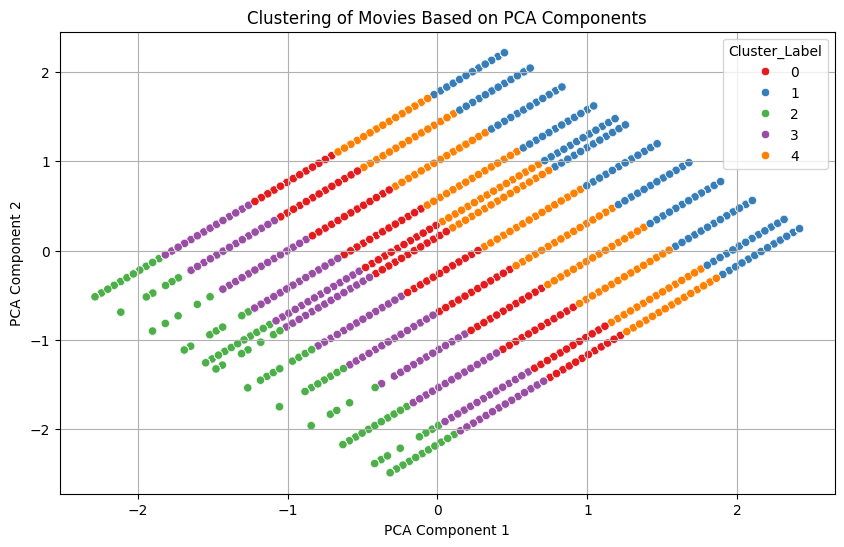

Cluster-labeled dataset saved to /content/drive/MyDrive/Movie_Recommendation_System/cluster_labeled_movies.csv


In [22]:
from sklearn.cluster import KMeans
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset with PCA applied
movies_df_encoded = pd.read_csv(pca_dataset_path)

# Select features for clustering (e.g., PCA components, audienceScore, runtimeMinutes)
cluster_features = ['PCA_1', 'PCA_2', 'audienceScore', 'runtimeMinutes']

# Apply K-Means Clustering
kmeans = KMeans(n_clusters=5, random_state=42)  # Adjust the number of clusters as per your business need
movies_df_encoded['Cluster_Label'] = kmeans.fit_predict(movies_df_encoded[cluster_features])

# Visualize the clusters (using PCA components for visualization)
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PCA_1', y='PCA_2', hue='Cluster_Label', palette='Set1', data=movies_df_encoded)
plt.title('Clustering of Movies Based on PCA Components')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.grid(True)
plt.show()

# Save the dataset with cluster labels
cluster_dataset_path = '/content/drive/MyDrive/Movie_Recommendation_System/cluster_labeled_movies.csv'
movies_df_encoded.to_csv(cluster_dataset_path, index=False)

print(f"Cluster-labeled dataset saved to {cluster_dataset_path}")


Analyze Cluster Characteristics, Visualizing Cluster Distributions,

Analyze Cluster Characteristics:

Summary statistics for each cluster:
   Cluster_Label audienceScore                      runtimeMinutes         \
                         mean     median       std           mean median   
0             0     55.895257  55.674967  3.271103      91.750220   92.0   
1             1     57.585633  55.674967  3.511964     122.097067  125.0   
2             2     56.236264  55.674967  2.471453      63.223178   61.0   
3             3     55.943383  55.674967  3.104061      80.087413   80.0   
4             4     56.813287  55.674967  3.631048     104.107863  104.0   

             
        std  
0  2.984622  
1  3.893696  
2  3.491196  
3  3.944601  
4  4.282872  

Dominating Genres per Cluster:
   Cluster_Label     Dominant_Genre
0              0        genre_Drama
1              1        genre_Drama
2              2  genre_Documentary
3              3        genre_Drama
4              4        genre_Drama

Mean Audience Score by Cluster:
   Cluster_Label

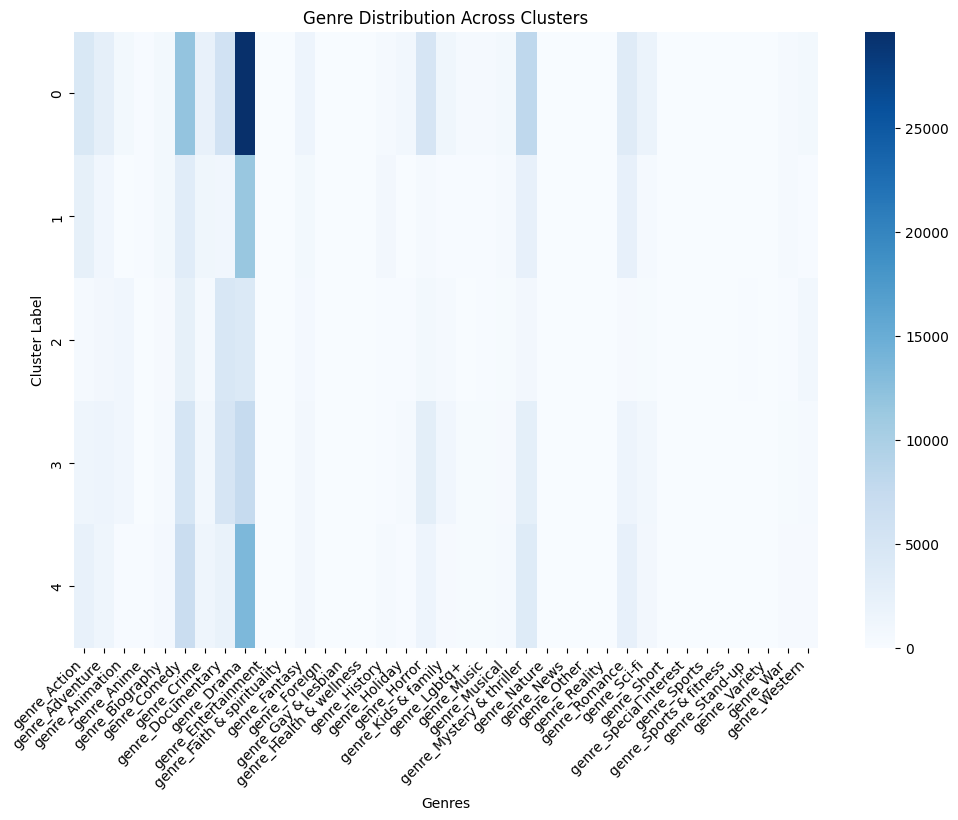

<ipython-input-23-77ead22e9a5b>:58: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=cluster_df, x='Cluster_Label', y='audienceScore', palette='Set1')


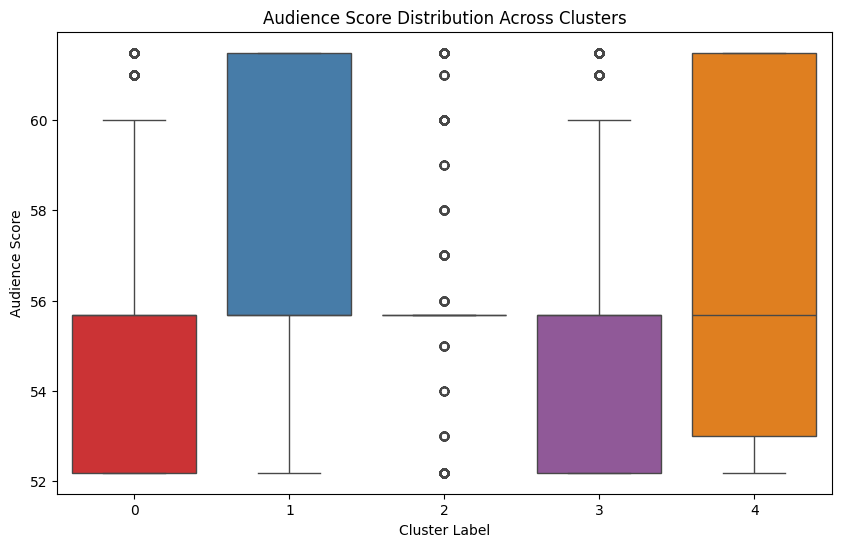

<ipython-input-23-77ead22e9a5b>:66: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=cluster_df, x='Cluster_Label', y='runtimeMinutes', palette='Set3')


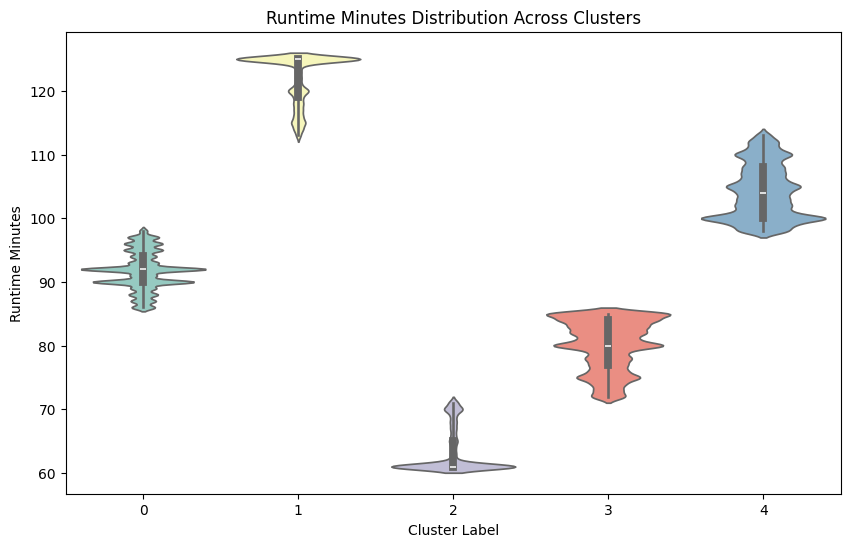


Cluster-Based Recommendations:

Recommendations for Cluster 2:
                                                   title       Genres  \
203101                                     The Seafarers  Documentary   
195285                                          Lonesome       Comedy   
202443  Maggie Simpson in The Force Awakens From Its Nap       Comedy   
183221                    Goldilocks and the Three Bears       Comedy   
165384                             Legion of Missing Men    Adventure   

        audienceScore  runtimeMinutes  
203101      52.187418            61.0  
195285      61.487549            69.0  
202443      52.187418            61.0  
183221      55.674967            61.0  
165384      55.674967            63.0  

Cluster-Based Filtering Recommendations for a user who likes Cluster 0:
                                    title   Genres  audienceScore  \
209345                      Tear Me Apart   Horror      55.674967   
171124                              Black    D

In [23]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the cluster-labeled dataset
cluster_df = pd.read_csv('/content/drive/MyDrive/Movie_Recommendation_System/cluster_labeled_movies.csv')

# Analyze Cluster Characteristics
print("Analyze Cluster Characteristics:\n")

# Summary statistics for each cluster (excluding 'tomatoMeter')
cluster_summary = cluster_df.groupby('Cluster_Label').agg({
    'audienceScore': ['mean', 'median', 'std'],
    'runtimeMinutes': ['mean', 'median', 'std']
}).reset_index()

# Display the summary statistics
print("Summary statistics for each cluster:\n", cluster_summary)

# Which genres dominate each cluster?
print("\nDominating Genres per Cluster:")
# Sum the genre columns for each cluster and find the most common genre
genre_columns = [col for col in cluster_df.columns if col.startswith('genre_')]
genre_dominance = cluster_df.groupby('Cluster_Label')[genre_columns].sum().reset_index()

# Find the dominating genre for each cluster
dominant_genres = genre_dominance.set_index('Cluster_Label').idxmax(axis=1).reset_index()
dominant_genres.columns = ['Cluster_Label', 'Dominant_Genre']
print(dominant_genres)

# Do clusters correspond to different levels of audience satisfaction?
print("\nMean Audience Score by Cluster:")
audience_satisfaction = cluster_df.groupby('Cluster_Label')['audienceScore'].mean().reset_index()
print(audience_satisfaction)

# Are there specific directors more frequent in one cluster than another?
print("\nMost Frequent Directors per Cluster:")
director_frequencies = cluster_df.groupby(['Cluster_Label', 'director']).size().reset_index(name='count')
frequent_directors = director_frequencies.loc[director_frequencies.groupby('Cluster_Label')['count'].idxmax()]
print(frequent_directors)

# Visualize Cluster Distributions
print("\nVisualizing Cluster Distributions:\n")

# Instead of plotting each genre individually, create a heatmap showing the sum of genres across clusters
genre_summary = cluster_df.groupby('Cluster_Label')[genre_columns].sum()
plt.figure(figsize=(12, 8))
sns.heatmap(genre_summary, cmap="Blues", annot=False)
plt.title('Genre Distribution Across Clusters')
plt.xlabel('Genres')
plt.ylabel('Cluster Label')
plt.xticks(rotation=45, ha='right')
plt.show()

# Box plot for audienceScore distribution across clusters
plt.figure(figsize=(10, 6))
sns.boxplot(data=cluster_df, x='Cluster_Label', y='audienceScore', palette='Set1')
plt.title('Audience Score Distribution Across Clusters')
plt.xlabel('Cluster Label')
plt.ylabel('Audience Score')
plt.show()

# Violin plot for runtimeMinutes distribution across clusters
plt.figure(figsize=(10, 6))
sns.violinplot(data=cluster_df, x='Cluster_Label', y='runtimeMinutes', palette='Set3')
plt.title('Runtime Minutes Distribution Across Clusters')
plt.xlabel('Cluster Label')
plt.ylabel('Runtime Minutes')
plt.show()

# Cluster-Based Recommendations
print("\nCluster-Based Recommendations:\n")

# Function to recommend movies from the same cluster
def recommend_movies_from_cluster(cluster_label, num_recommendations=5):
    # Filter movies from the same cluster
    recommended_movies = cluster_df[cluster_df['Cluster_Label'] == cluster_label].sample(n=num_recommendations)
    # Combine genres into one column for better readability
    recommended_movies['Genres'] = recommended_movies[genre_columns].apply(lambda x: ', '.join(x.index[x == 1].str.replace('genre_', '')), axis=1)
    return recommended_movies[['title', 'Genres', 'audienceScore', 'runtimeMinutes']]

# Example: Recommending movies from Cluster 2
print(f"Recommendations for Cluster 2:")
print(recommend_movies_from_cluster(2))

# Optional: Cluster Labels in the Recommendation System
# This is an integration step where you would add 'Cluster_Label' as a feature in your recommendation system.
# You can incorporate this into your hybrid or collaborative filtering models to improve performance.

# Optional: Deploy Cluster-Based Filtering (Example)
def cluster_based_filtering(user_favorite_cluster):
    """
    Function to recommend movies based on user's favorite cluster.
    :param user_favorite_cluster: The cluster label the user prefers (e.g., 0, 1, 2, etc.)
    :return: Recommended movies from the cluster.
    """
    return recommend_movies_from_cluster(user_favorite_cluster)

# Example: Recommend movies based on user's preference for Cluster 0
print("\nCluster-Based Filtering Recommendations for a user who likes Cluster 0:")
print(cluster_based_filtering(0))


Handling Imbalanced Datasets

Explained variance ratio: [0.96171554 0.03828446]
Total explained variance: 1.0


/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


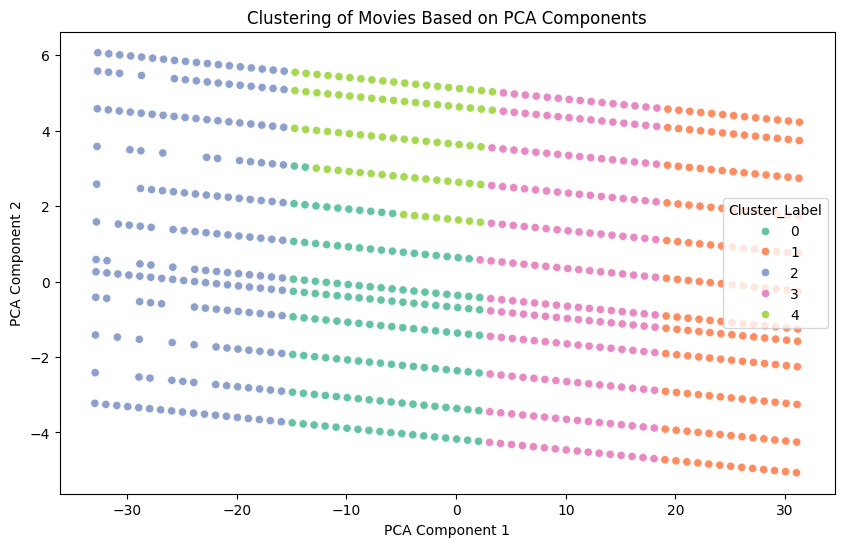

Cluster Characteristics Summary:

Cluster 0:
       audienceScore  runtimeMinutes
count   79838.000000    79838.000000
mean       54.406289       89.102721
std         1.697751        4.510419
min        52.187418       79.000000
25%        52.187418       86.000000
50%        55.674967       90.000000
75%        55.674967       92.000000
max        59.000000       96.000000

Cluster 1:
       audienceScore  runtimeMinutes
count   31996.000000    31996.000000
mean       57.509872      121.880985
std         3.515326        4.088988
min        52.187418      113.000000
25%        55.674967      119.000000
50%        55.674967      125.000000
75%        61.487549      125.000000
max        61.487549      125.000000

Cluster 2:
       audienceScore  runtimeMinutes
count   32513.000000    32513.000000
mean       56.196176       67.572940
std         2.659472        6.502449
min        52.187418       61.000000
25%        55.674967       61.000000
50%        55.674967       67.000000
75%   

In [24]:
# Select only available numeric columns
X_movies = movies_df_cleaned[['audienceScore', 'runtimeMinutes']]  # Removed 'tomatoMeter'

# Step 1: Apply PCA for dimensionality reduction
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_movies)

print("Explained variance ratio:", pca.explained_variance_ratio_)
print("Total explained variance:", sum(pca.explained_variance_ratio_))

# Step 2: Apply KMeans clustering
kmeans = KMeans(n_clusters=5, random_state=42)
movies_df_cleaned['Cluster_Label'] = kmeans.fit_predict(X_pca)

# Step 3: Visualize the clustering result
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=movies_df_cleaned['Cluster_Label'], palette="Set2")
plt.title('Clustering of Movies Based on PCA Components')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend(title='Cluster_Label')
plt.show()

# Step 4: Analyze cluster characteristics (mean, median, etc.)
print("Cluster Characteristics Summary:")
for cluster in sorted(movies_df_cleaned['Cluster_Label'].unique()):
    print(f"\nCluster {cluster}:")
    cluster_data = movies_df_cleaned[movies_df_cleaned['Cluster_Label'] == cluster]
    print(cluster_data[['audienceScore', 'runtimeMinutes']].describe())  # 'tomatoMeter' removed here as well

# Step 5: Analyze genre distribution within clusters
for cluster in sorted(movies_df_cleaned['Cluster_Label'].unique()):
    print(f"\nCluster {cluster} Genre Distribution:")
    print(movies_df_cleaned[movies_df_cleaned['Cluster_Label'] == cluster]['genre'].value_counts().head())


In [48]:
import joblib

# Path to save models
svd_model_path = '/content/drive/MyDrive/Movie_Recommendation_System/svd_model.pkl'
knn_model_path = '/content/drive/MyDrive/Movie_Recommendation_System/knn_model.pkl'
nmf_model_path = '/content/drive/MyDrive/Movie_Recommendation_System/nmf_model.pkl'

# Save models to .pkl files
joblib.dump(svd, svd_model_path)
joblib.dump(knn, knn_model_path)
joblib.dump(nmf, nmf_model_path)

print("Models saved successfully.")


Models saved successfully.


In [49]:
# Load models from .pkl files
svd_loaded = joblib.load(svd_model_path)
knn_loaded = joblib.load(knn_model_path)
nmf_loaded = joblib.load(nmf_model_path)

print("Models loaded successfully.")


Models loaded successfully.


In [51]:
import pandas as pd

# Assuming you have user_ids, movie_ids, and predicted ratings from your model
user_ids = [1, 2, 3, 4, 5]  # Example user IDs
movie_ids = [101, 102, 103, 104, 105]  # Example movie IDs
predicted_ratings = [4.5, 3.8, 4.0, 5.0, 2.9]  # Example predicted ratings

# Create a DataFrame with the predictions
predicted_ratings_df = pd.DataFrame({
    'user_id': user_ids,
    'movie_id': movie_ids,
    'predicted_rating': predicted_ratings
})

# Now you can save the DataFrame to a CSV file
predictions_path = '/content/drive/MyDrive/Movie_Recommendation_System/predicted_ratings.csv'
predicted_ratings_df.to_csv(predictions_path, index=False)
print(f"Predicted ratings saved to {predictions_path}")


Predicted ratings saved to /content/drive/MyDrive/Movie_Recommendation_System/predicted_ratings.csv


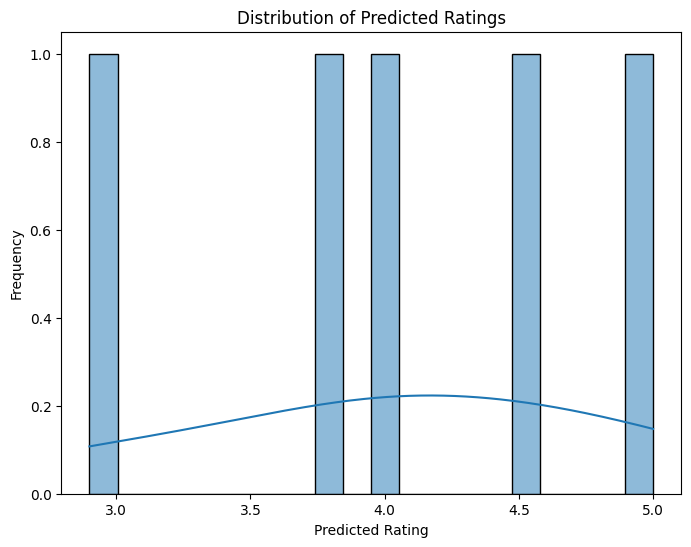

In [57]:
import matplotlib.pyplot as plt
import seaborn as sns

# Distribution of predicted ratings
plt.figure(figsize=(8,6))
sns.histplot(predicted_ratings_df['predicted_rating'], bins=20, kde=True)
plt.title('Distribution of Predicted Ratings')
plt.xlabel('Predicted Rating')
plt.ylabel('Frequency')
plt.show()


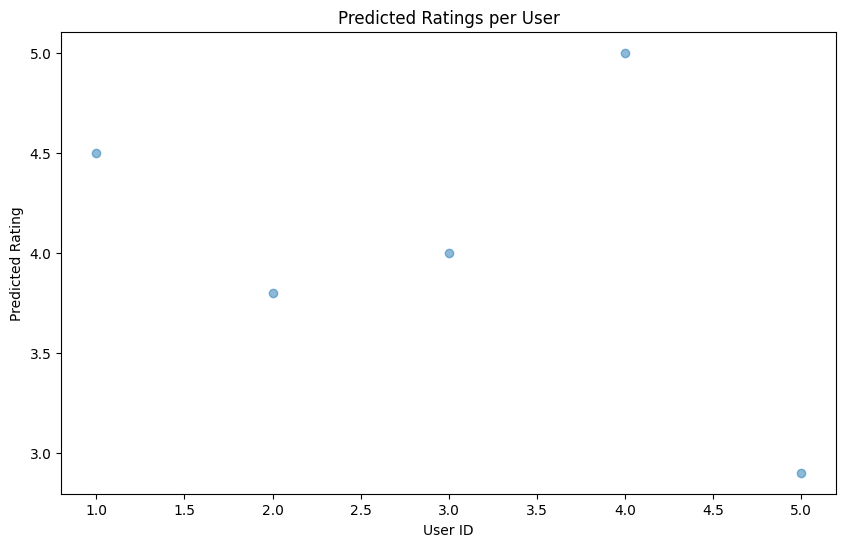

In [58]:
plt.figure(figsize=(10,6))
plt.scatter(predicted_ratings_df['user_id'], predicted_ratings_df['predicted_rating'], alpha=0.5)
plt.title('Predicted Ratings per User')
plt.xlabel('User ID')
plt.ylabel('Predicted Rating')
plt.show()


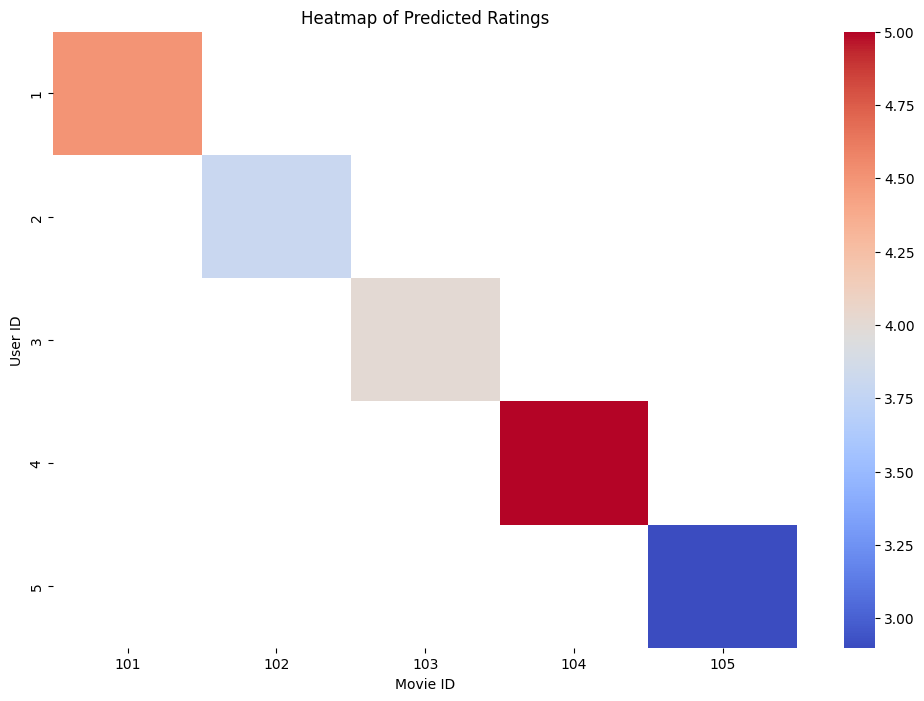

In [59]:
# Create a pivot table for heatmap visualization
ratings_pivot = predicted_ratings_df.pivot(index='user_id', columns='movie_id', values='predicted_rating')

# Plotting the heatmap
plt.figure(figsize=(12,8))
sns.heatmap(ratings_pivot, cmap='coolwarm', cbar=True)
plt.title('Heatmap of Predicted Ratings')
plt.xlabel('Movie ID')
plt.ylabel('User ID')
plt.show()


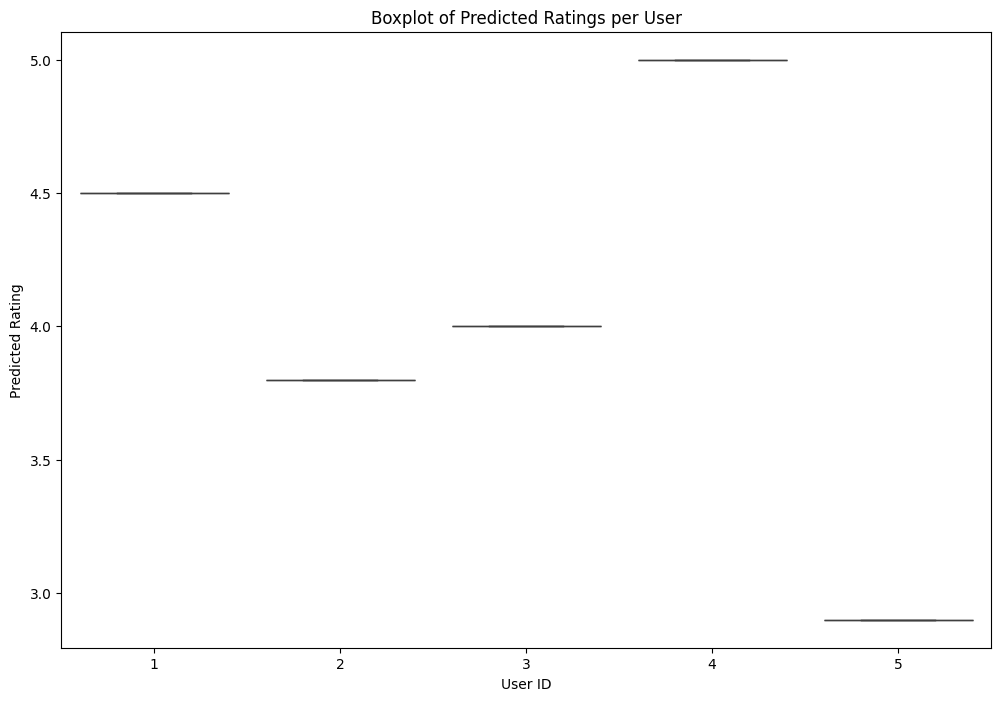

In [60]:
plt.figure(figsize=(12,8))
sns.boxplot(x='user_id', y='predicted_rating', data=predicted_ratings_df)
plt.title('Boxplot of Predicted Ratings per User')
plt.xlabel('User ID')
plt.ylabel('Predicted Rating')
plt.show()


In [79]:
!pip install streamlit


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.7/8.7 MB 32.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 11.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 40.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.9/82.9 kB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 4.1 MB/s eta 0:00:00
  Attempting uninstall: tenacity
    Found existing installation: tenacity 9.0.0
    Uninstalling tenacity-9.0.0:
      Successfully uninstalled tenacity-9.0.0


In [ ]:
import os

# Define the base path
base_path = '/content/drive/MyDrive/Movie_Recommendation_System/'

# Create the necessary directories if they don't exist
if not os.path.exists(base_path):
    os.makedirs(base_path)

print(f"Directory structure is set up at: {base_path}")


In [80]:
# Create the app.py file and write the Streamlit code
app_code = '''
import streamlit as st
import pandas as pd
import os

# Load the dataset
movies_df = pd.read_csv('/content/drive/MyDrive/Movie_Recommendation_System/cleaned_rotten_tomatoes_movies.csv')

# Title and subtitle
st.title("Movie Recommender System Using Machine Learning")
st.write("Type or select a movie from the dropdown")

# Dropdown for movie selection
selected_movie = st.selectbox("Select a movie", movies_df['title'].unique())

# Function to get movie recommendations (replace with actual recommendation logic)
def get_recommendations(selected_movie, movies_df, n=5):
    # Dummy logic: sample n random movies as recommendations
    # Replace this with the logic of your recommendation system
    recommended_movies = movies_df.sample(n)
    return recommended_movies

# Show recommendation button
if st.button('Show Recommendation'):
    st.write("You selected:", selected_movie)

    # Get recommendations
    recommended_movies = get_recommendations(selected_movie, movies_df)

    st.write("Recommended Movies:")
    for index, row in recommended_movies.iterrows():
        st.write(row['title'])
        # Replace with actual poster link from your dataset if available
        st.image('https://via.placeholder.com/150', caption=row['title'])  # Placeholder image URL


'''

# Save the file to the specified directory
app_file_path = os.path.join(base_path, 'app.py')
with open(app_file_path, 'w') as f:
    f.write(app_code)

print(f"app.py saved at: {app_file_path}")


app.py saved at: /content/drive/MyDrive/Movie_Recommendation_System/app.py


In [78]:
!streamlit run app.py


/bin/bash: line 1: streamlit: command not found


In [62]:
ls /content/drive/MyDrive/Movie_Recommendation_System/Movie-Recommendation-System/

bfg-1.14.0.jar  env/                          README.md                          scripts/
data/           Movie-Recommendation-System/  rotten_tomatoes_movie_reviews.csv
EDA.ipynb       notebooks/                    rotten_tomatoes_movies.csv


In [63]:
ls /content/drive/MyDrive/Movie_Recommendation_System/

app.py                                       Movie-Recommendation-System/
balanced_rotten_tomatoes_reviews.csv         movies_minmax_scaled.csv
cleaned_merged_data.csv                      movies_standard_scaled.csv
cleaned_rotten_tomatoes_movies.csv           nmf_model.pkl
cleaned_rotten_tomatoes_reviews.csv          outliers_treated_movies.csv
cluster_labeled_movies.csv                   pca_encoded_movies.csv
encoded_dummy_movies.csv                     predicted_ratings.csv
encoded_movies.csv                           rotten_tomatoes_movie_reviews.csv
encoded_rotten_tomatoes_movies.csv           rotten_tomatoes_movies.csv
encoded_rotten_tomatoes_movies_partial.csv   scaled_rotten_tomatoes_movies.csv
feature_selected_rotten_tomatoes_movies.csv  svd_model.pkl
knn_model.pkl


In [81]:
!npm install -g localtunnel



changed 22 packages, and audited 23 packages in 1s

3 packages are looking for funding
  run `npm fund` for details

1 moderate severity vulnerability

To address all issues (including breaking changes), run:
  npm audit fix --force

Run `npm audit` for details.
your url is: https://smooth-walls-tell.loca.lt
^C


In [82]:
!curl https://loca.lt/mytunnelpassword


34.125.32.138

In [83]:
# Run the Streamlit app
!streamlit run /content/drive/MyDrive/Movie_Recommendation_System/app.py & npx localtunnel --port 8501




your url is: https://wet-rice-think.loca.lt

  You can now view your Streamlit app in your browser.

  Local URL: http://localhost:8501
  Network URL: http://172.28.0.12:8501
  External URL: http://34.125.32.138:8501

  Stopping...
  Stopping...


KeyboardInterrupt: 

In [85]:
!git init
!git remote add origin https://github.com/TejaswiniVasu/Movie-Recommendation-System.git

Reinitialized existing Git repository in /content/Movie-Recommendation-System/.git/
error: remote origin already exists.


In [89]:
!git config --global user.name "Tejaswini V"
!git config --global user.email "tejaswini.vasu.tej@gmail.com"

In [90]:
!apt-get install git


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
git is already the newest version (1:2.34.1-1ubuntu1.11).
0 upgraded, 0 newly installed, 0 to remove and 49 not upgraded.


In [91]:
!git add app.py cleaned_rotten_tomatoes_movies.csv
!git commit -m "Add app.py and dataset for Streamlit movie recommendation system"

fatal: pathspec 'app.py' did not match any files
[main 87a92f1] Add app.py and dataset for Streamlit movie recommendation system
 1 file changed, 1 insertion(+)
 create mode 160000 Movie-Recommendation-System


In [95]:
!git push -u origin main


Branch 'main' set up to track remote branch 'main' from 'origin'.
Everything up-to-date
